In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, BayesianRidge
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error
import pickle
from sklearn.svm import SVR

In [77]:
data = pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')

df = data.merge(labels, how = 'left', on = ['city', 'year', 'weekofyear'])

In [3]:
df.set_index('week_start_date', drop = True, inplace = True)

In [4]:
df.shape

(1456, 24)

In [108]:
df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 25 columns]

In [5]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

In [110]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [109]:
df.corr()

year  weekofyear   ndvi_ne  \
year                                   1.000000   -0.071649  0.223361   
weekofyear                            -0.071649    1.000000  0.053548   
ndvi_ne                                0.223361    0.053548  1.000000   
ndvi_nw                                0.144345    0.048759  0.850902   
ndvi_se                                0.234234    0.121557  0.614380   
ndvi_sw                                0.277759    0.068701  0.669504   
precipitation_amt_mm                   0.205302    0.118037  0.205736   
reanalysis_air_temp_k                 -0.140016    0.425753 -0.340976   
reanalysis_avg_temp_k                  0.085043    0.463677 -0.037682   
reanalysis_dew_point_temp_k            0.132273    0.348946  0.056077   
reanalysis_max_air_temp_k              0.480402    0.238078  0.634330   
reanalysis_min_air_temp_k             -0.392351    0.179679 -0.623116   
reanalysis_precip_amt_kg_per_m2        0.132625    0.072955  0.199411   
reanalysis_relative_humidity_percent   0.336349   -0.015191  0.457985   
reanalysis_sat_precip_amt_mm           0.205302    0.118037  0.205736   
reanalysis_specific_humidity_g_per_kg  0.161596    0.350821  0.094852   
reanalysis_tdtr_k                      0.490542    0.077933  0.673935   
station_avg_temp_c                     0.047010    0.368408  0.186227   
station_diur_temp_rng_c                0.373644    0.023220  0.658129   
station_max_temp_c                     0.227320    0.232098  0.491922   
station_min_temp_c                    -0.214482    0.292362 -0.315696   
station_precip_mm                      0.219910    0.066294  0.242263   
total_cases                           -0.306806    0.216452 -0.241376   

                                        ndvi_nw   ndvi_se   ndvi_sw  \
year                                   0.144345  0.234234  0.277759   
weekofyear                             0.048759  0.121557  0.068701   
ndvi_ne                                0.850902  0.614380  0.669504   
ndvi_nw                                1.000000  0.555809  0.651938   
ndvi_se                                0.555809  1.000000  0.820924   
ndvi_sw                                0.651938  0.820924  1.000000   
precipitation_amt_mm                   0.193563  0.074633  0.124047   
reanalysis_air_temp_k                 -0.317862 -0.157447 -0.227824   
reanalysis_avg_temp_k                 -0.030974  0.051348  0.022533   
reanalysis_dew_point_temp_k            0.063289  0.002810  0.020746   
reanalysis_max_air_temp_k              0.606775  0.468054  0.546460   
reanalysis_min_air_temp_k             -0.588806 -0.407931 -0.494284   
reanalysis_precip_amt_kg_per_m2        0.190989  0.034792  0.101652   
reanalysis_relative_humidity_percent   0.449152  0.215606  0.311759   
reanalysis_sat_precip_amt_mm           0.193563  0.074633  0.124047   
reanalysis_specific_humidity_g_per_kg  0.100626  0.028795  0.053437   
reanalysis_tdtr_k                      0.645596  0.486047  0.569554   
station_avg_temp_c                     0.203975  0.089242  0.121060   
station_diur_temp_rng_c                0.649483  0.449599  0.545899   
station_max_temp_c                     0.490122  0.290691  0.377393   
station_min_temp_c                    -0.304206 -0.251621 -0.294684   
station_precip_mm                      0.221314  0.131326  0.158345   
total_cases                           -0.202235 -0.168612 -0.196461   

                                       precipitation_amt_mm  \
year                                               0.205302   
weekofyear                                         0.118037   
ndvi_ne                                            0.205736   
ndvi_nw                                            0.193563   
ndvi_se                                            0.074633   
ndvi_sw                                            0.124047   
precipitation_amt_mm                               1.000000   
reanalysis_air_temp_k                             -0.017229   
reanalysis_avg_tem

# Data Cleaning & Feature Engineering

In [7]:
def pre_processing(df, cols_to_drop = ['weekofyear', 'year'], period = 2):
    #get rid of time series index
    df.reset_index(drop = True, inplace = True)
    
    df.interpolate(method = 'linear', inplace = True) #viewed as best method for filling in missing values
    
    df.drop(['reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg'], axis = 1, inplace = True)
    #drop columns since they are 99+% correlated with precipitation_amt_mm & reanalysis_dew_point_temp_k respectively
    
    
    #The occurance of a 53rd week of the year is so uncommon since 52 * 7 = 364 (i.e year starts on monday) (1/7)
    #Therefore I wanted to include this data as a 52 week, and assume that this wouldn't cause too much bais
    for i in range(len(df.weekofyear)):
        if df.weekofyear[i] == 53:
            df.weekofyear[i] = 52
    
    # Sine parameters are used to account for the cyclic nature of week of the year
    def sin_of_week(week, shift = 0):
        return np.sin((2 * np.pi * (week + shift)) / 52)
    
    
    #Although the scaler should account for this, it made for better peace of mind
    def kelvin_to_celcius(Tk):
        Tc = Tk - 273.15
        return Tc
    
    df['reanalysis_dew_point_temp_k'] = df['reanalysis_dew_point_temp_k'].apply(lambda x : kelvin_to_celcius(x))
    df['reanalysis_air_temp_k'] = df['reanalysis_air_temp_k'].apply(lambda x : kelvin_to_celcius(x))
    df['reanalysis_max_air_temp_k'] = df['reanalysis_max_air_temp_k'].apply(lambda x : kelvin_to_celcius(x))
    df['reanalysis_min_air_temp_k'] = df['reanalysis_min_air_temp_k'].apply(lambda x : kelvin_to_celcius(x))
    df['reanalysis_avg_temp_k'] = df['reanalysis_avg_temp_k'].apply(lambda x : kelvin_to_celcius(x))
    df['reanalysis_tdtr_k'] = df['reanalysis_tdtr_k'].apply(lambda x : kelvin_to_celcius(x))
    
    def time_shift(df = df, period = period):
    # creates additional data from the previous week(s) to act as predictors
    # this will hopefully account for the delay between optimal mosquito breeding weather and cases arising
        cols = {}
        for col in df.columns:
            cols[col] = col
            
        copy = df.copy()
        
        for i in range(1, period+1):
            df = df.merge(copy.shift(periods = i).loc[:, 'ndvi_ne':'station_precip_mm']
                          .rename(columns = {old_col: new_col + '_d' + str(i) for (old_col,new_col) in cols.items()}), 
                          how = 'left', on = df.index, right_index = True)
        
        return df
    
    df = time_shift()
    
    df.bfill(inplace = True)  #backfill all the NaN created in the time shift columns
    
    if 'week_start_date' in df.columns:
        df.set_index('week_start_date', drop = True, inplace = True)
    
    
    
    df_sj = df[(df.city == 'sj')].drop(['city'], axis = 1)
    df_iq = df[(df.city == 'iq')].drop(['city'], axis = 1)
    
    df_sj['sin_week'] = df_sj.weekofyear.apply(lambda x : sin_of_week(-x, shift = 4))
    df_iq['sin_week'] = df_iq.weekofyear.apply(lambda x : sin_of_week(x, shift = 10))
    
    df_sj.drop(cols_to_drop, axis = 1, inplace = True)
    df_iq.drop(cols_to_drop, axis = 1, inplace = True)
    
    return df_sj, df_iq

In [8]:
def sin_of_week(week, shift = 0):
        return np.sin((2 * np.pi * (week + shift)) / 52)

## Since each city has their own climate, analysing and modelling them seperately is crucial

In [9]:
for i in range(len(df.weekofyear)):
        if df.weekofyear[i] == 53:
            df.weekofyear[i] = 52

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
df_sj = df[(df.city == 'sj')].drop(['city'], axis = 1)
df_iq = df[(df.city == 'iq')].drop(['city'], axis = 1)

In [79]:
df_sj.shape

(936, 24)

In [12]:
df_sj['sin_week'] = df_sj.weekofyear.apply(lambda x : sin_of_week(-x, shift = 4))
df_iq['sin_week'] = df_iq.weekofyear.apply(lambda x : sin_of_week(x, shift = 10))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


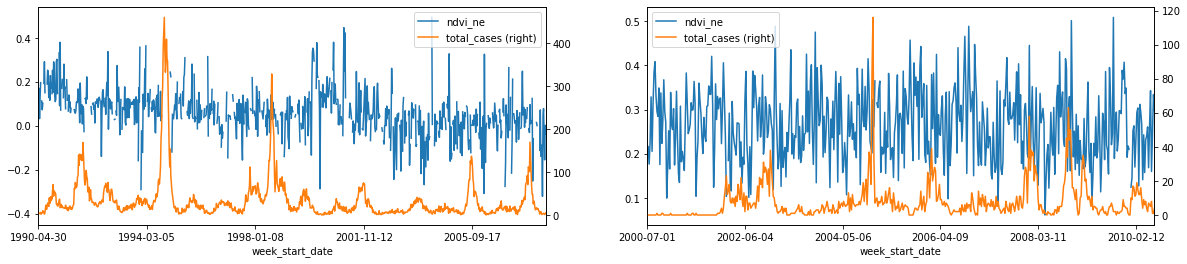

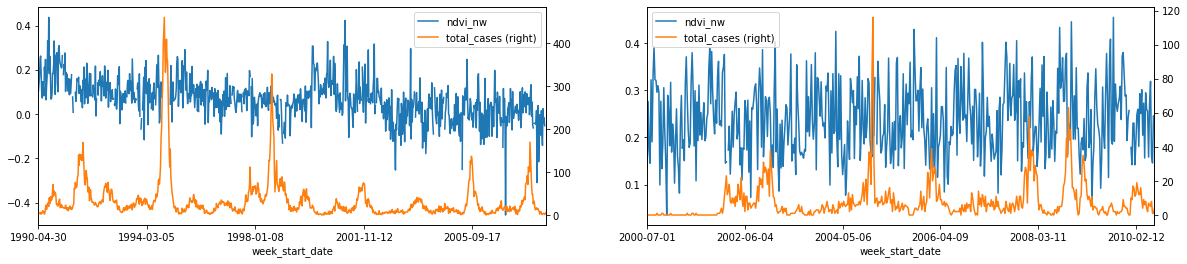

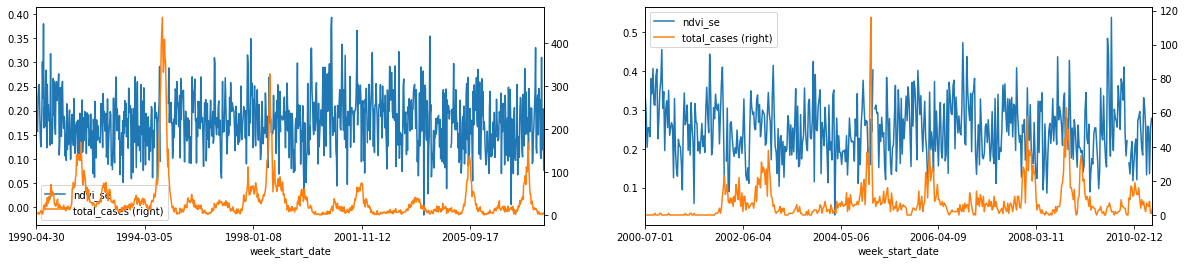

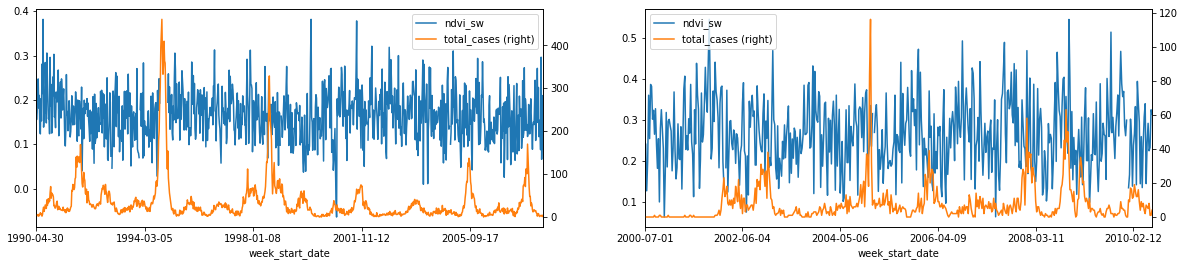

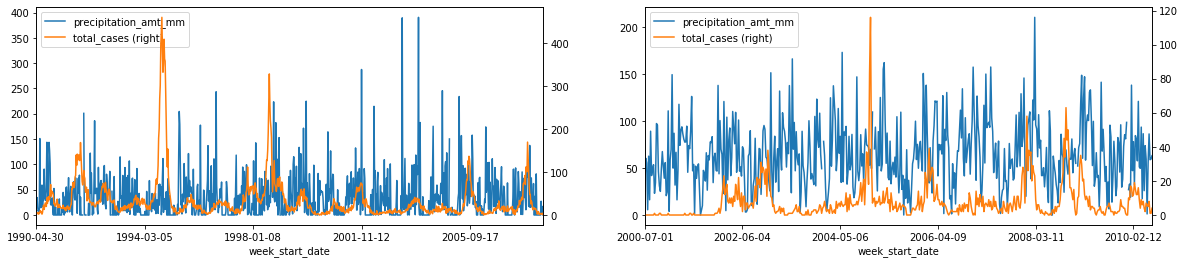

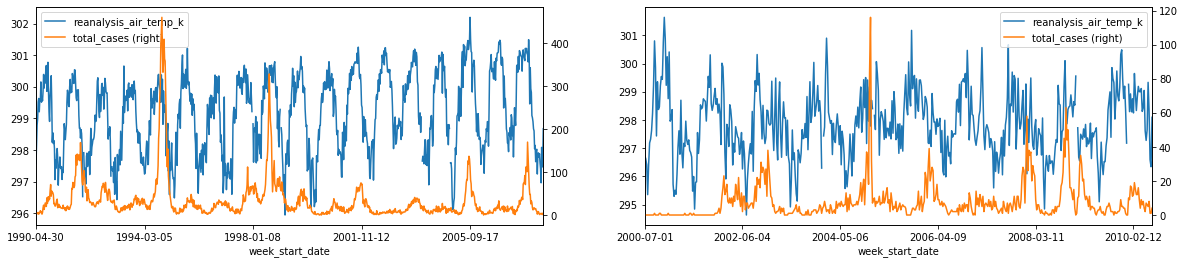

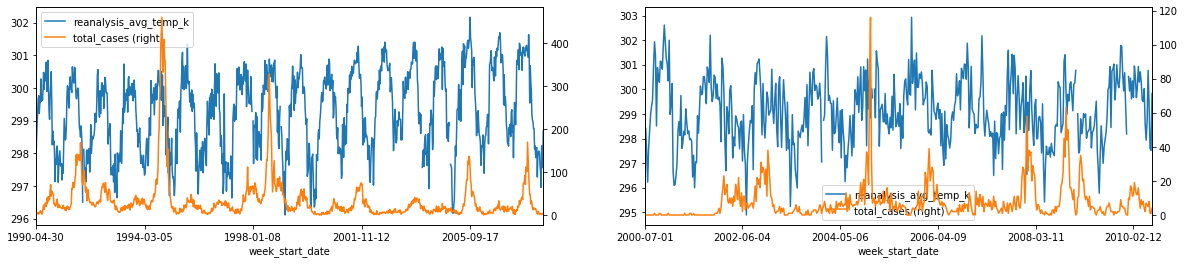

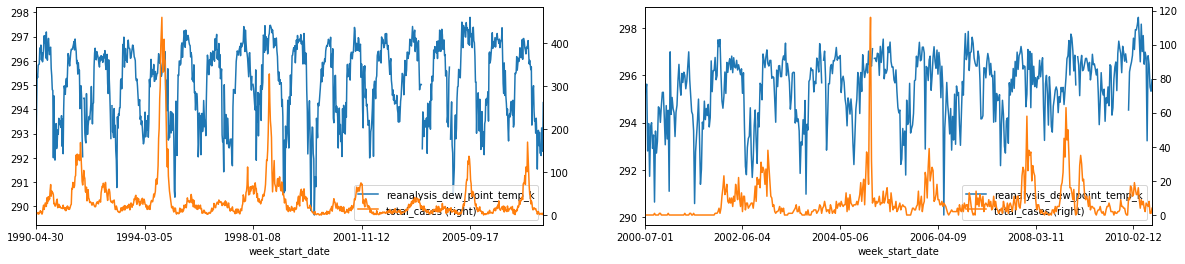

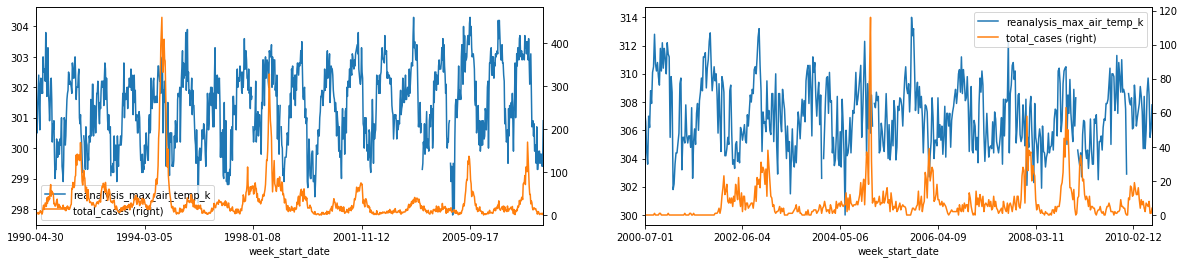

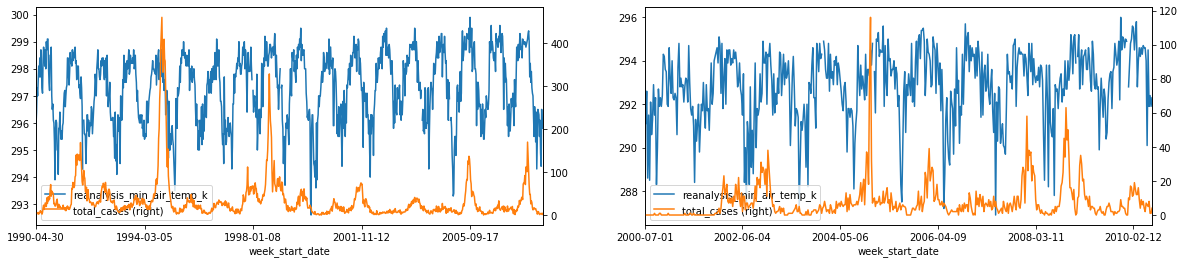

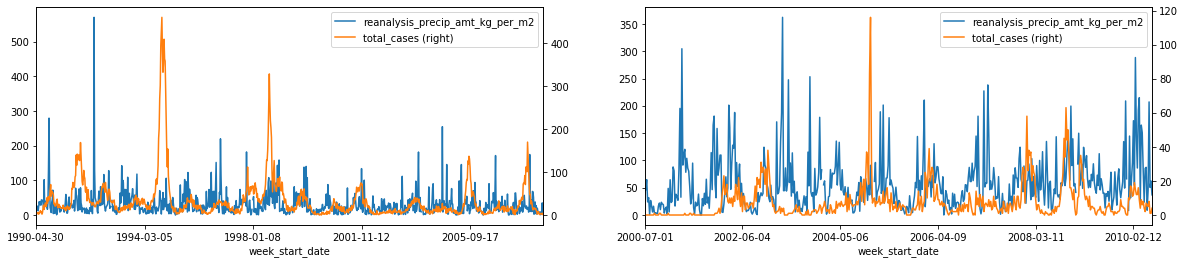

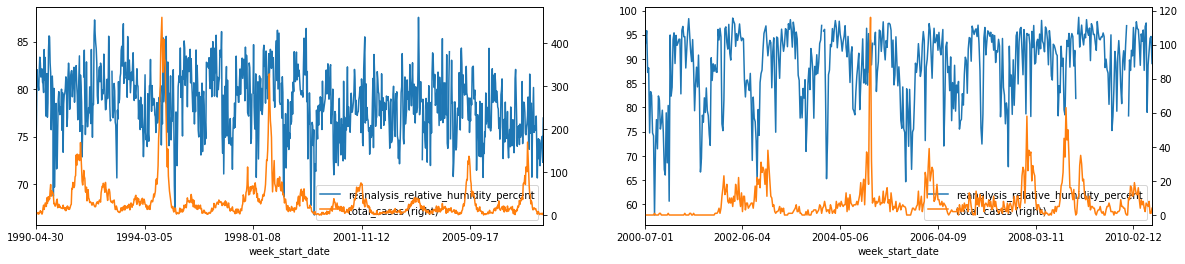

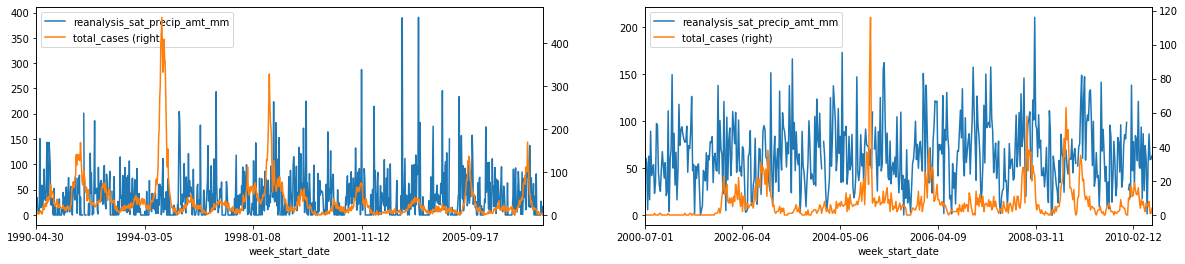

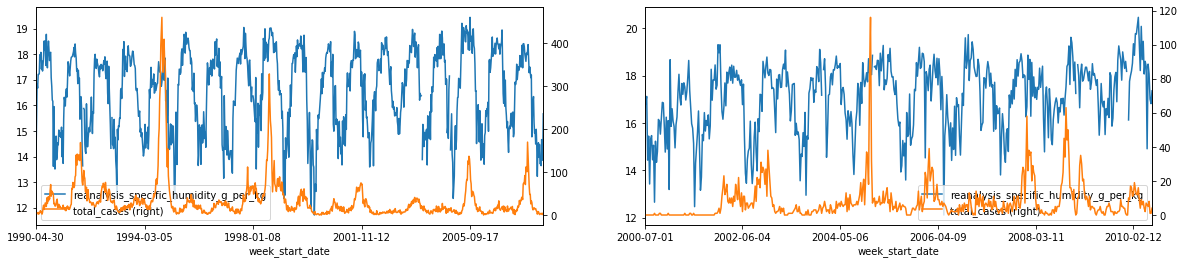

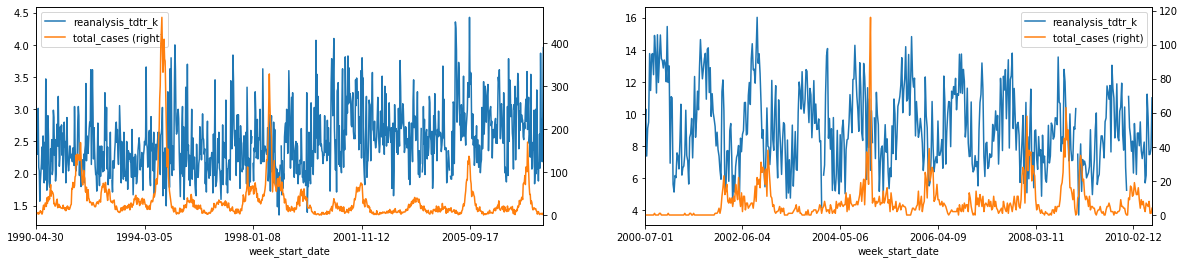

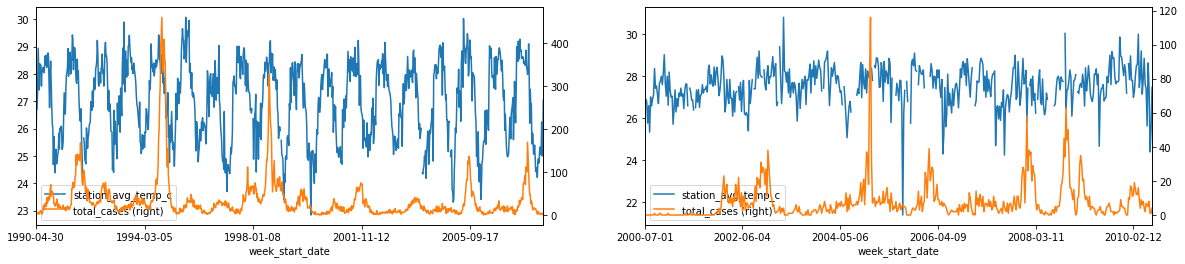

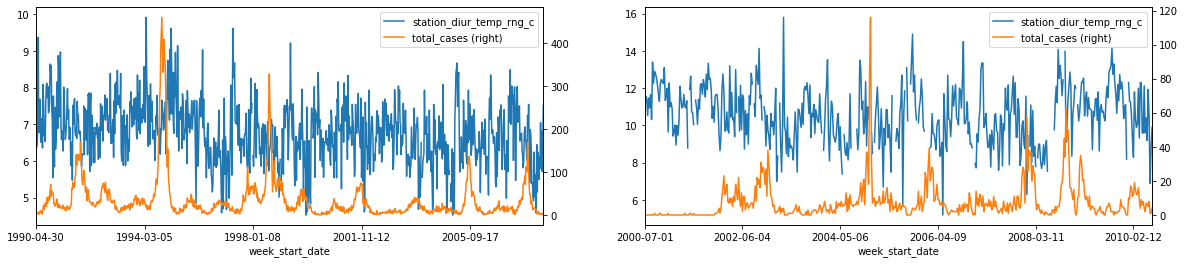

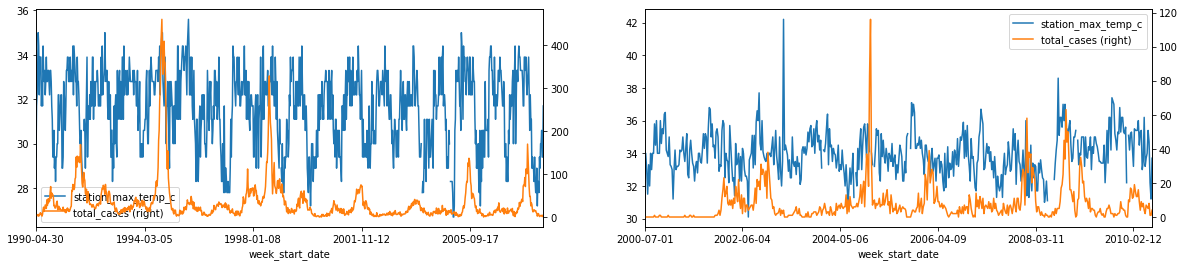

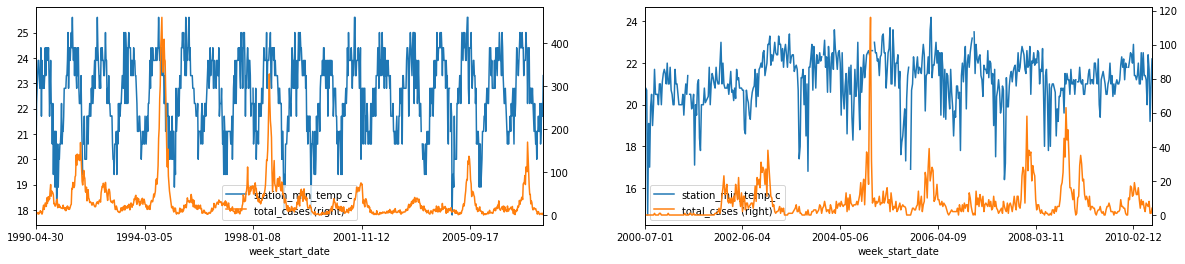

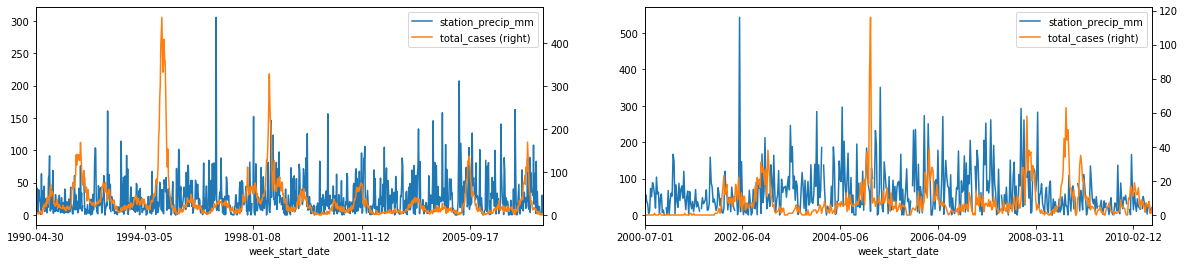

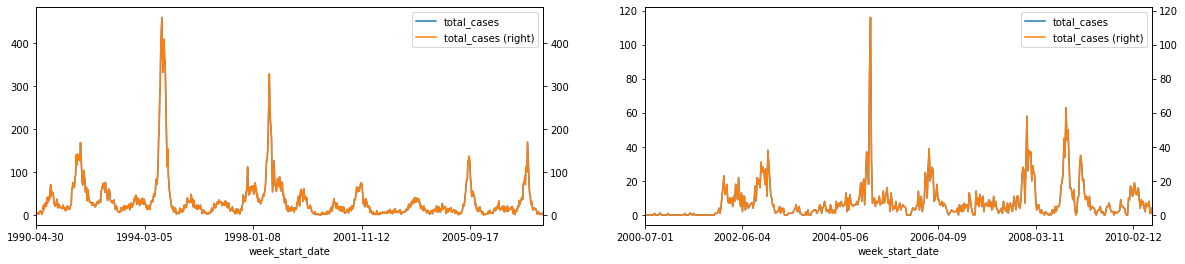

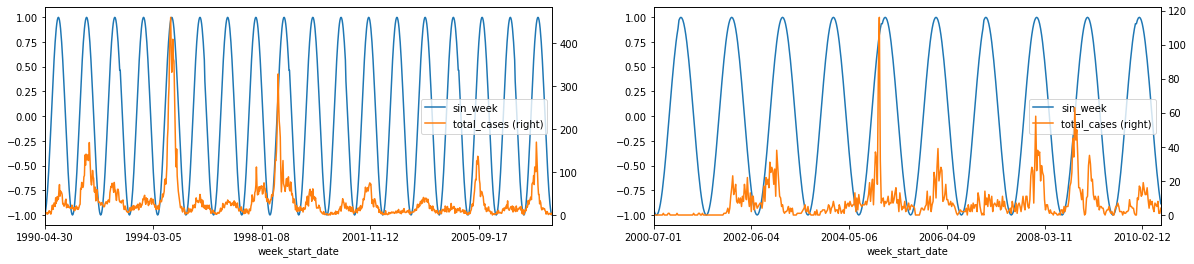

In [13]:
for col in df_sj.columns[2:]:
    if df_sj[col].dtype != object:
        fig, axes = plt.subplots(ncols = 2, figsize = (20,4))
        df_sj.plot(y = col, ax = axes[0]);
        df_sj.plot(y = 'total_cases', ax = axes[0], secondary_y = True);
        df_iq.plot(y = col, ax = axes[1]);
        df_iq.plot(y = 'total_cases', ax = axes[1], secondary_y = True);

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


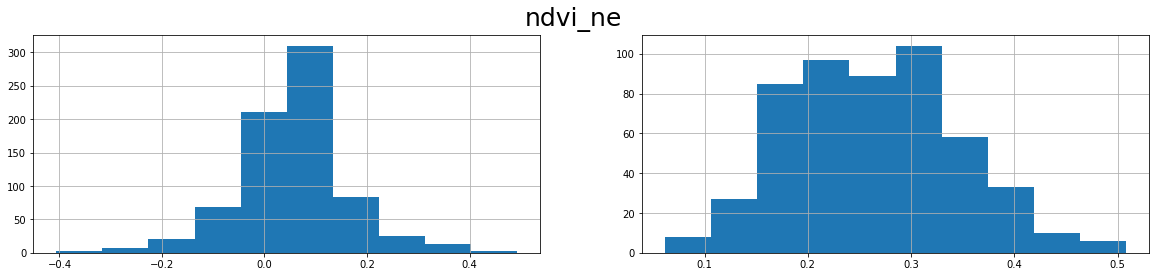

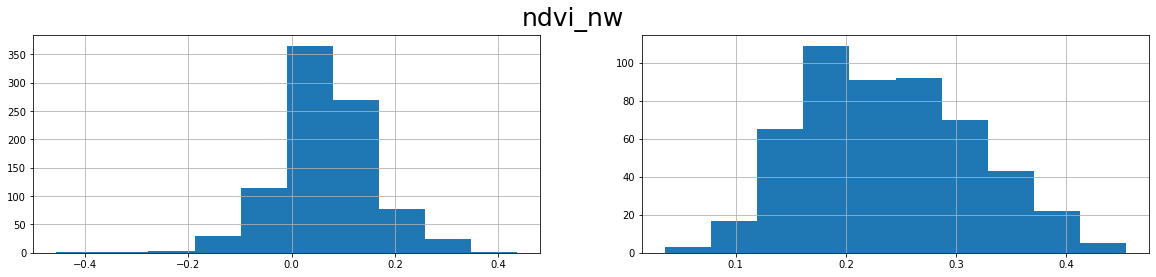

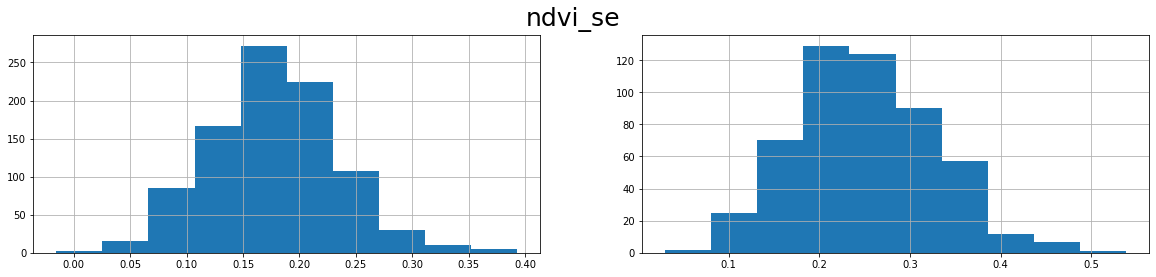

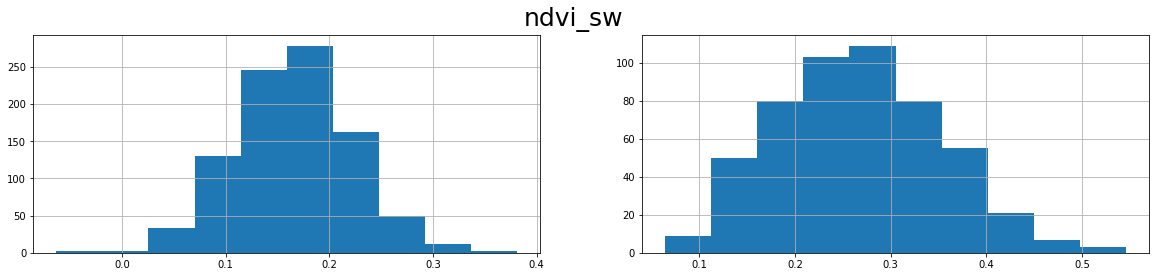

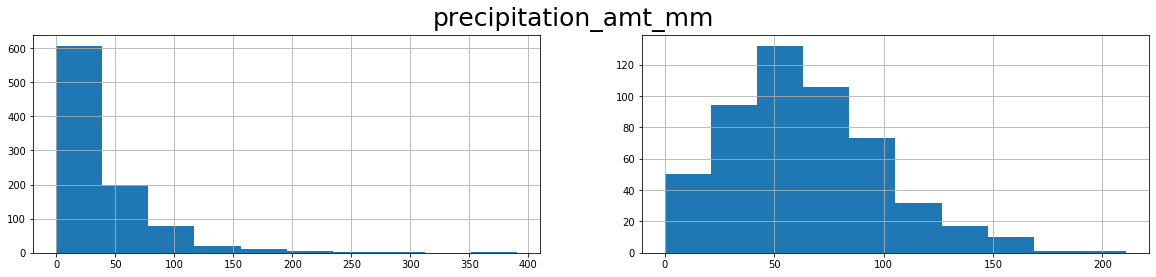

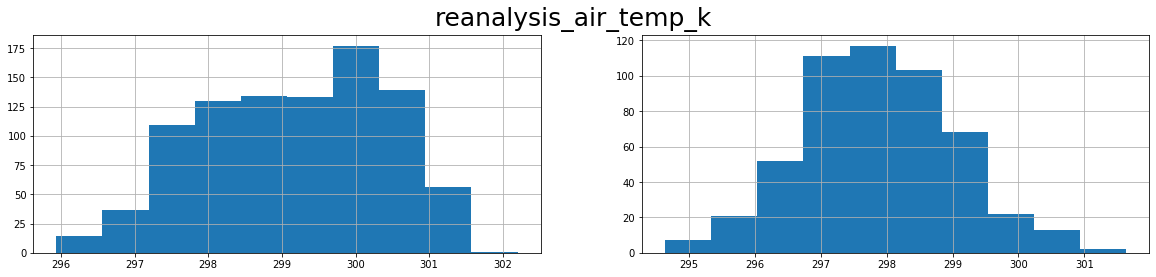

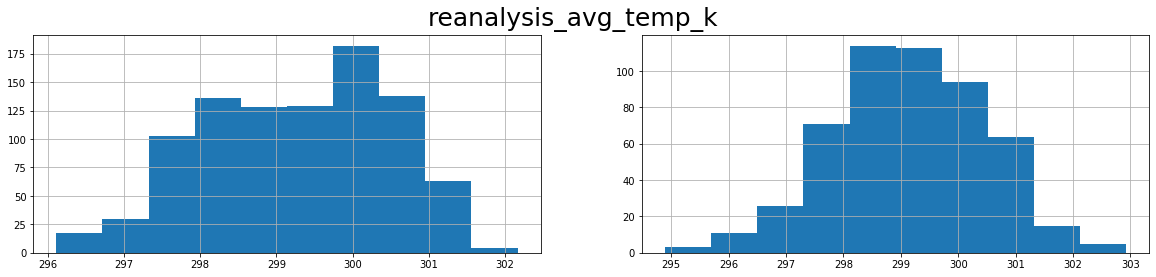

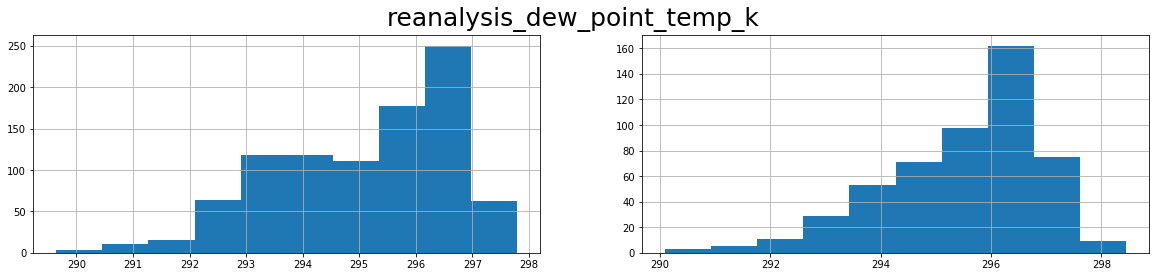

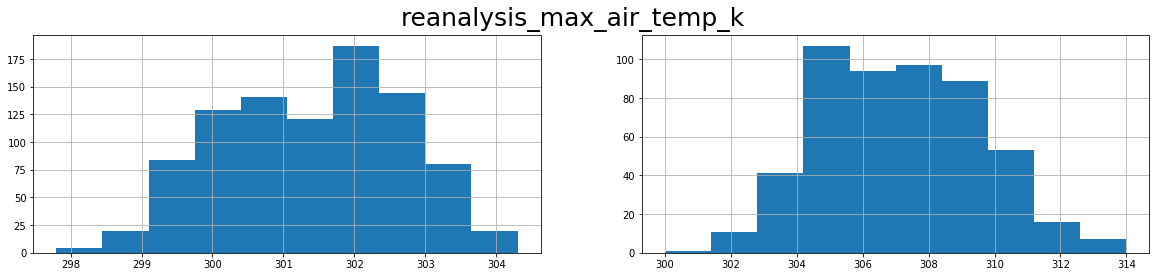

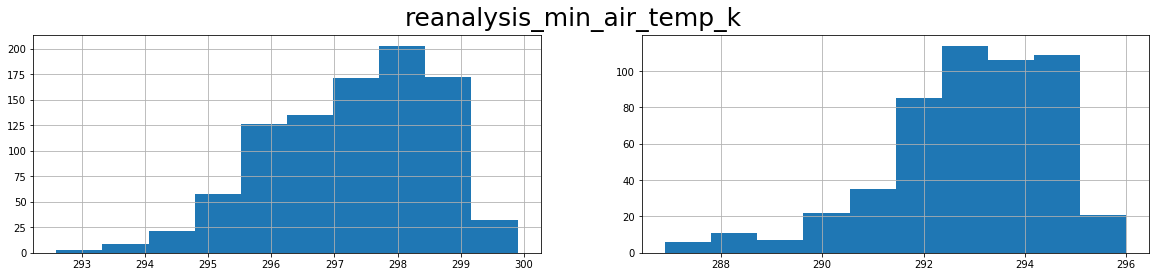

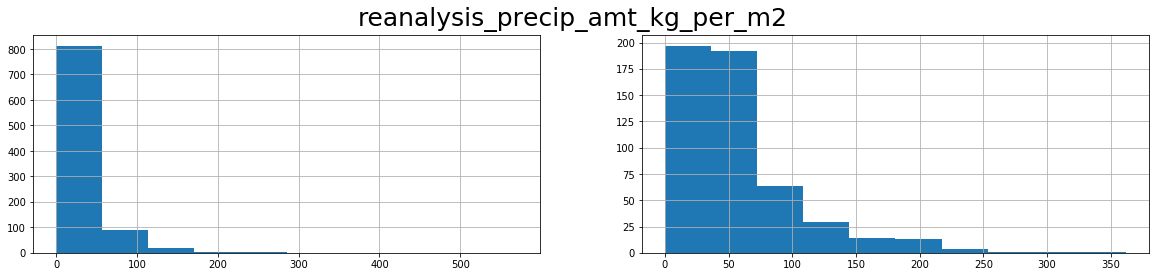

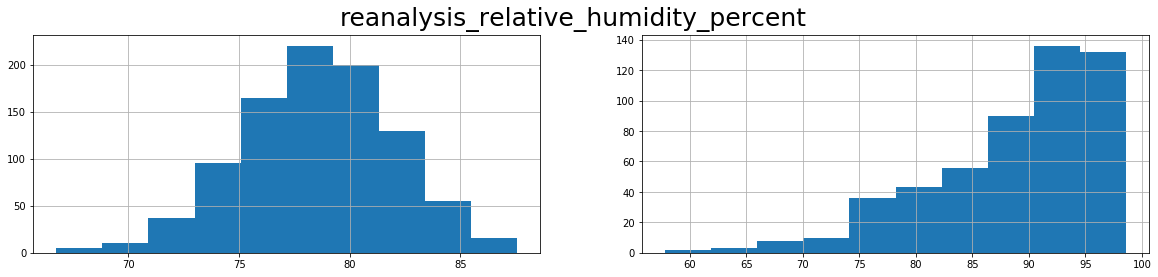

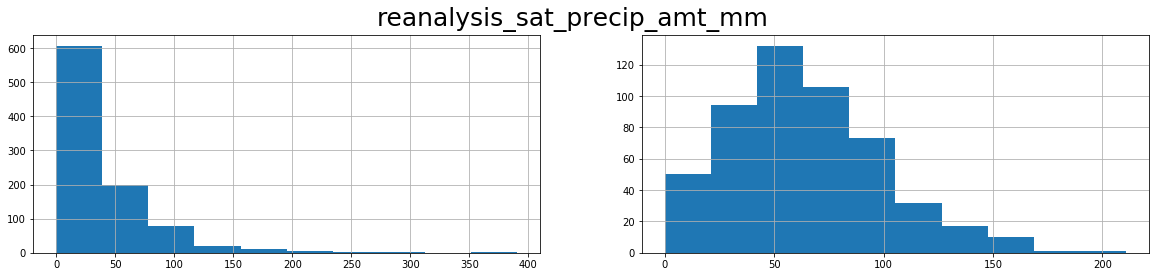

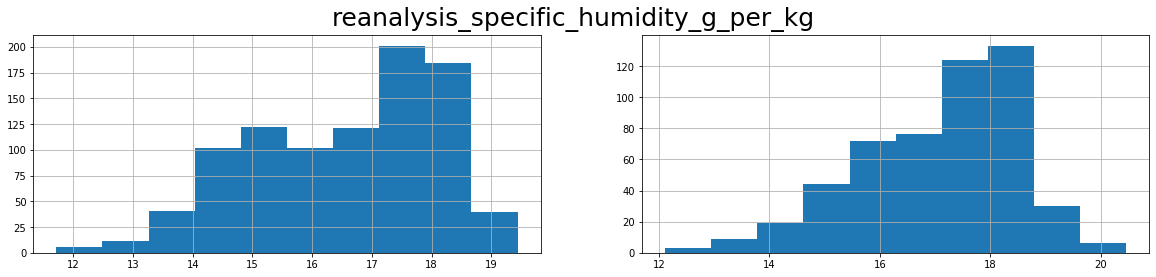

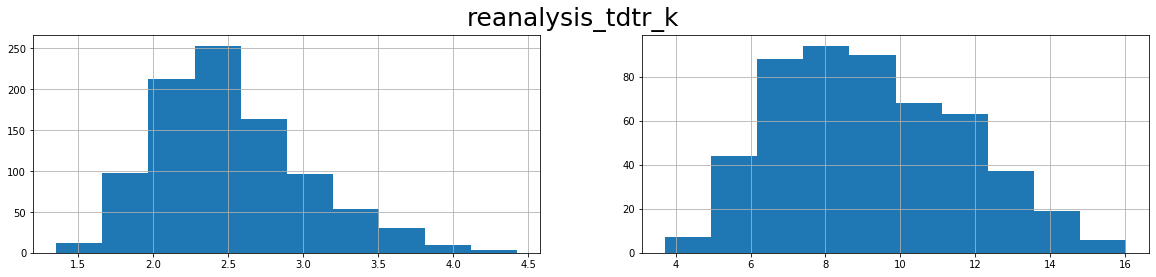

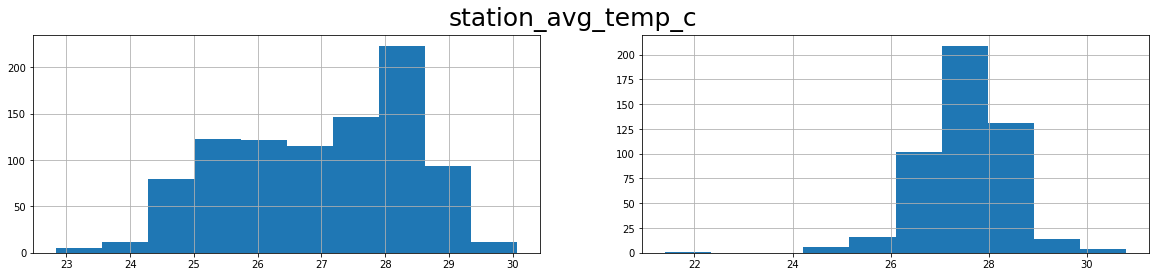

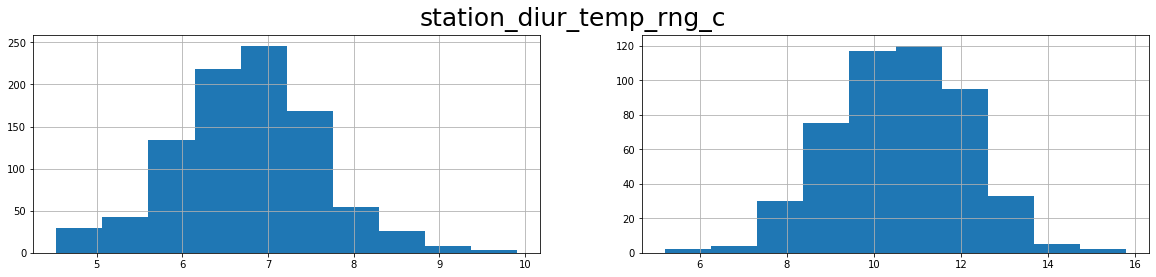

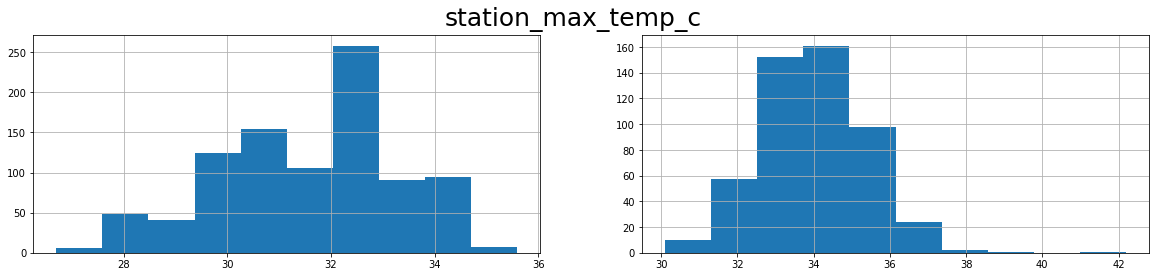

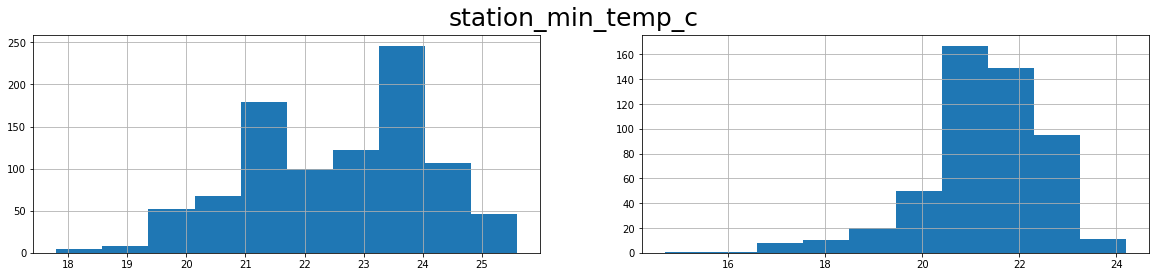

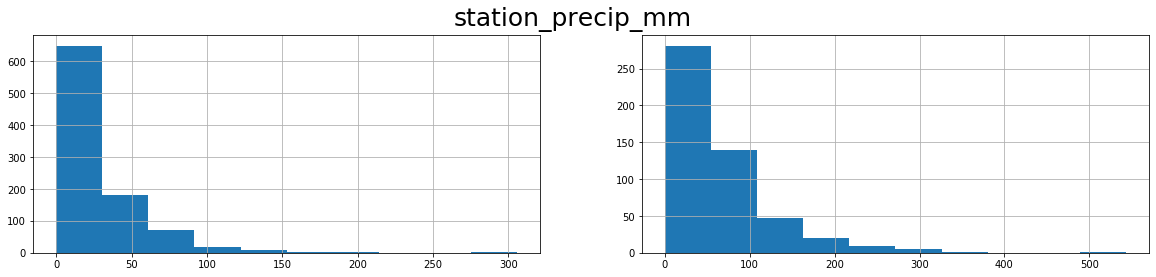

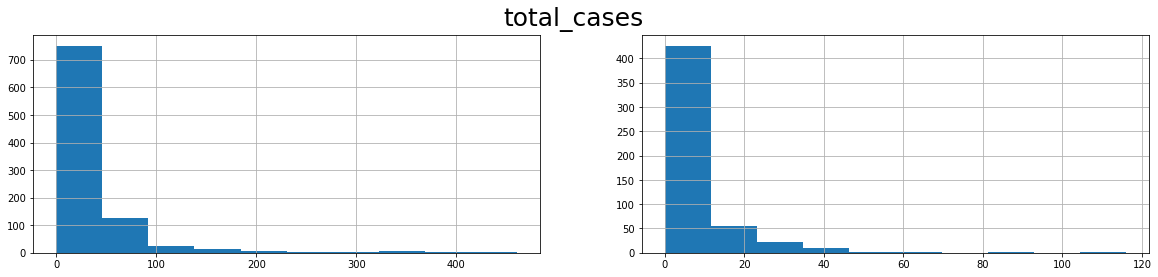

In [107]:
for col in df_sj.columns[2:]:
    if df_sj[col].dtype != object:
        fig, axes = plt.subplots(ncols = 2, figsize = (20,4))
        df_sj[col].hist(ax = axes[0]);
        plt.suptitle(col, size = 25);
        df_iq[col].hist(ax = axes[1]);

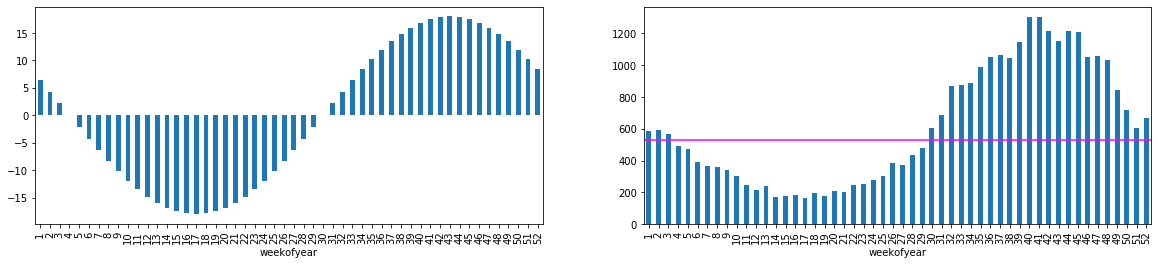

In [14]:
fig, axes = plt.subplots(ncols = 2, figsize = (20,4))
df_sj.groupby(by = 'weekofyear').sum().sin_week.plot(kind = 'bar', figsize = (20,4), ax = axes[0]);
df_sj.groupby(by = 'weekofyear').sum().total_cases.plot(kind = 'bar', figsize = (20,4), axes = axes[1]);
plt.axhline(y = df_sj.groupby(by = 'weekofyear').sum().total_cases.median(), c = 'fuchsia');

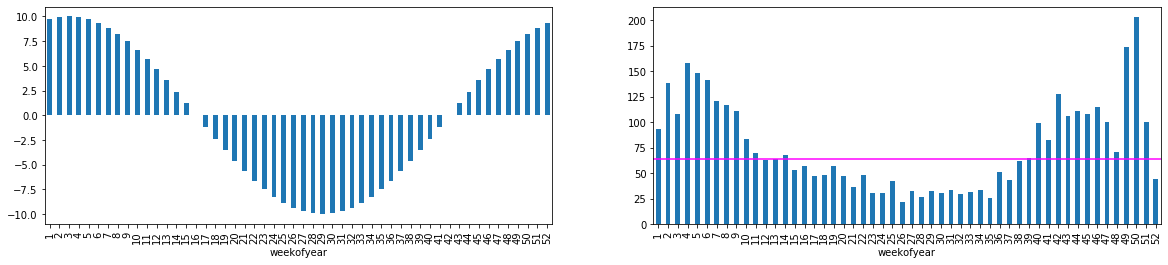

In [15]:
fig, axes = plt.subplots(ncols = 2, figsize = (20,4))
df_iq.groupby(by = 'weekofyear').sum().sin_week.plot(kind = 'bar', figsize = (20,4), ax = axes[0]);
df_iq.groupby(by = 'weekofyear').sum().total_cases.plot(kind = 'bar', figsize = (20,4), axes = axes[1]);
plt.axhline(y = df_iq.groupby(by = 'weekofyear').sum().total_cases.median(), c = 'fuchsia');

SJ phase shift = week 4, IQ phase shift = week 10

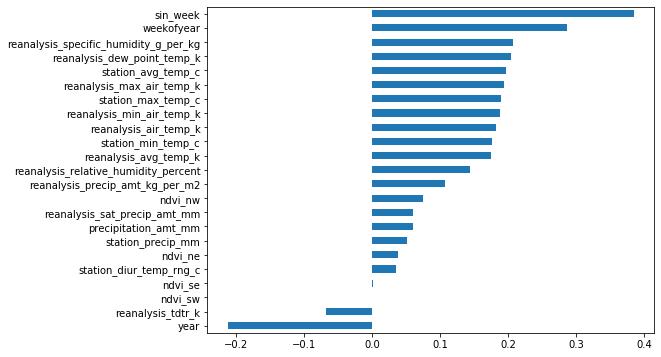

In [16]:
(df_sj.corr().total_cases
 .drop('total_cases').sort_values(ascending = True) #don't want to compare against itself - ruins the axis range
 .plot(kind = 'barh', figsize = (8,6)));

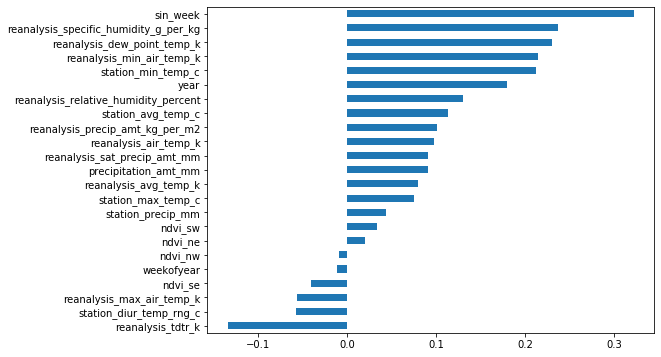

In [17]:
(df_iq.corr().total_cases
 .drop('total_cases').sort_values(ascending = True) #don't want to compare against itself - ruins the axis range
 .plot(kind = 'barh', figsize = (8,6)));

## Prepare Data for Modelling

In [18]:
data = pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')

df = data.merge(labels, how = 'left', on = ['city', 'year', 'weekofyear'])

In [19]:
df_sj, df_iq = pre_processing(df, period = 3 )

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
X = df_sj.copy()
y = X.pop('total_cases')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print('CV Score: ',cross_val_score(model, X_train, y_train, cv = 5).mean())
print('Test Score: ', model.score(X_test, y_test))
print('CV MAE Score: ',cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error').mean())
predictions = model.predict(X_test)
mean_absolute_error(predictions, y_test)

0.37198272198137494
CV Score:  0.04480310805614909
Test Score:  0.045549599315758305
CV MAE Score:  -30.49916772172756


29.923121363596557

In [24]:
clf = SVR()
gamma_range = np.logspace(-2, 2, 20)
C_range = np.logspace(0, 4, 20)
param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(clf, param_grid, cv=5,
                    verbose=1, n_jobs = -1, scoring = 'neg_mean_absolute_error')
grid.fit(X_train, y_train)

model = grid.best_estimator_
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print('CV Score: ',cross_val_score(model, X_train, y_train, cv = 5).mean())
print('Test Score: ', model.score(X_test, y_test))
print('5 CV MAE Score: ',cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * -1)
print('10 CV MAE Score: ',cross_val_score(model, X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error').mean() * -1)
predictions = model.predict(X_test)
print('Test MAE Score: ' ,mean_absolute_error(predictions, y_test))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 557 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 1557 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:   30.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   30.8s finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.2611487340664438
CV Score:  0.1612245167569359
Test Score:  0.16531019314523787
5 CV MAE Score:  20.928464139376644
10 CV MAE Score:  20.838969868920877
Test MAE Score:  19.29277377131535


In [25]:
model.get_params

<bound method BaseEstimator.get_params of SVR(C=18.329807108324356, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.7847599703514611, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)>

In [26]:
sj_SVM_model = model
filename = 'Models/sj_SVM_model.sav'
pickle.dump((sj_SVM_model), open(filename, 'wb'))
sj_scaler = scaler
pickle.dump((sj_scaler), open('Scalers/sj_scaler', 'wb'))

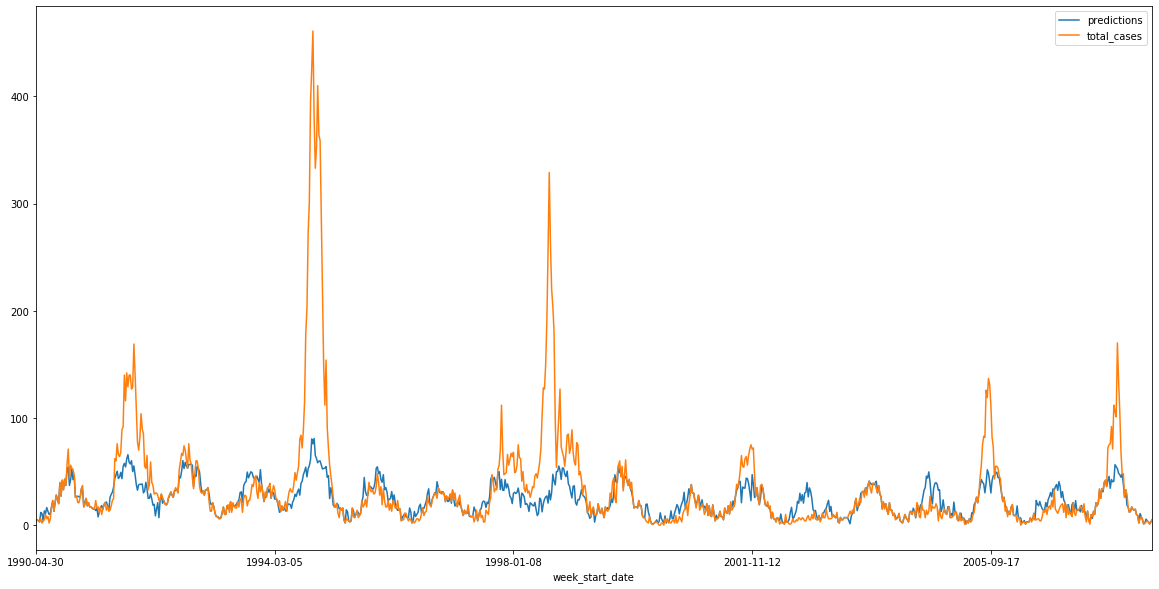

In [27]:
temp = df_sj.copy()
temp['predictions'] = model.predict(scaler.transform(X))
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(y = 'predictions', ax = ax);
temp.plot(y = 'total_cases', ax = ax);

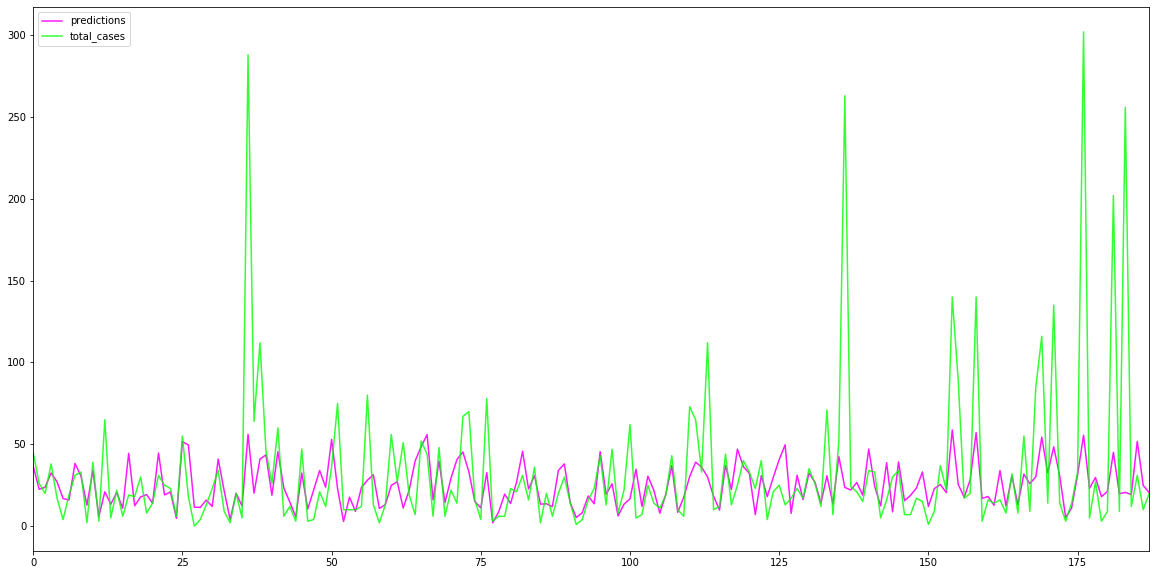

In [28]:
temp = pd.DataFrame()
temp['total_cases'] = y_test
temp['predictions'] = model.predict(X_test)
temp.reset_index(drop = True, inplace = True)
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(kind = 'line', y = 'predictions', ax = ax, color = 'fuchsia', alpha = 0.9);
temp.plot(kind = 'line', y = 'total_cases', ax = ax, secondary_y = False, color = 'lime', alpha = 0.8);

In [29]:
SV = pd.DataFrame({'Variable' : X.columns ,
                    'Support Vector' : pd.DataFrame(model.support_vectors_).mean()})

SV.sort_values(by = 'Support Vector', ascending = False)

Variable  Support Vector
7               reanalysis_dew_point_temp_k        0.684489
61           reanalysis_dew_point_temp_k_d3        0.680625
63             reanalysis_min_air_temp_k_d3        0.668875
9                 reanalysis_min_air_temp_k        0.668328
43           reanalysis_dew_point_temp_k_d2        0.665171
25           reanalysis_dew_point_temp_k_d1        0.664321
45             reanalysis_min_air_temp_k_d2        0.640687
27             reanalysis_min_air_temp_k_d1        0.639435
16                       station_min_temp_c        0.615962
70                    station_min_temp_c_d3        0.612783
52                    station_min_temp_c_d2        0.609733
34                    station_min_temp_c_d1        0.609078
55                               ndvi_nw_d3        0.586571
67                    station_avg_temp_c_d3        0.585490
37                               ndvi_nw_d2        0.582262
19                               ndvi_nw_d1        0.581922
5                     reanalysis_air_temp_k        0.577339
59                 reanalysis_air_temp_k_d3        0.576404
13                       station_avg_temp_c        0.572611
31                    station_avg_temp_c_d1        0.570333
49                    station_avg_temp_c_d2        0.569305
65  reanalysis_relative_humidity_percent_d3        0.568192
11     reanalysis_relative_humidity_percent        0.566709
47  reanalysis_relative_humidity_percent_d2        0.566265
6                     reanalysis_avg_temp_k        0.564088
60                 reanalysis_avg_temp_k_d3        0.562940
29  reanalysis_relative_humidity_percent_d1        0.561848
62             reanalysis_max_air_temp_k_d3        0.559024
8                 reanalysis_max_air_temp_k        0.552026
15                       station_max_temp_c        0.548485
..                                      ...             ...
57                               ndvi_sw_d3        0.512435
23                 reanalysis_air_temp_k_d1        0.511022
41                 reanalysis_air_temp_k_d2        0.509002
1                                   ndvi_nw        0.503284
72                                 sin_week        0.495008
38                               ndvi_se_d2        0.489091
56                               ndvi_se_d3        0.484151
20                               ndvi_se_d1        0.472318
2                                   ndvi_se        0.469867
39                               ndvi_sw_d2        0.468979
32               station_diur_temp_rng_c_d1        0.429886
50               station_diur_temp_rng_c_d2        0.411600
14                  station_diur_temp_rng_c        0.410695
68               station_diur_temp_rng_c_d3        0.409764
30                     reanalysis_tdtr_k_d1        0.377305
66                     reanalysis_tdtr_k_d3        0.375500
48                     reanalysis_tdtr_k_d2        0.375244
12                        reanalysis_tdtr_k        0.367829
22                  precipitation_amt_mm_d1        0.091493
40                  precipitation_amt_mm_d2        0.089954
4                      precipitation_amt_mm        0.089581
35                     station_precip_mm_d1        0.088795
17                        station_precip_mm        0.088675
58                  precipitation_amt_mm_d3        0.088608
53                     station_precip_mm_d2        0.087308
71                     station_precip_mm_d3        0.086991
46       reanalysis_precip_amt_kg_per_m2_d2        0.054103
28       reanalysis_precip_amt_kg_per_m2_d1        0.053692
10          reanalysis_precip_amt_kg_per_m2        0.053443
64       reanalysis_precip_amt_kg_per_m2_d3        0.052660

[73 rows x 2 columns]

In [30]:
model = RidgeCV(alphas=np.logspace(-1, 3, 500), cv=10 , scoring = 'neg_mean_absolute_error')
model.fit(X_train, y_train)
R_model = model
print(model.alpha_)
best_alpha = model.alpha_
print(model.score(X_train, y_train))
print('CV Score: ',cross_val_score(Ridge(alpha = best_alpha), X_train, y_train, cv = 5).mean())
print('Test Score: ', model.score(X_test, y_test))
print('5 CV MAE Score: ',cross_val_score(Ridge(alpha = best_alpha), X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * -1)
print('10 CV MAE Score: ',cross_val_score(Ridge(alpha = best_alpha), X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error').mean() * -1)
predictions = model.predict(X_test)
print('Test MAE Score: ' ,mean_absolute_error(predictions, y_test))

20.352475211835756
0.2317762098827585
CV Score:  0.17993257670977833
Test Score:  0.16809627922270365
5 CV MAE Score:  24.412270086837335
10 CV MAE Score:  24.259357474925906
Test MAE Score:  24.892123588364406


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
sj_Ridge_model = model
filename = 'Models/sj_Ridge_model.sav'
pickle.dump((sj_Ridge_model), open(filename, 'wb'))
sj_scaler = scaler
pickle.dump((sj_scaler), open('Scalers/sj_scaler', 'wb'))

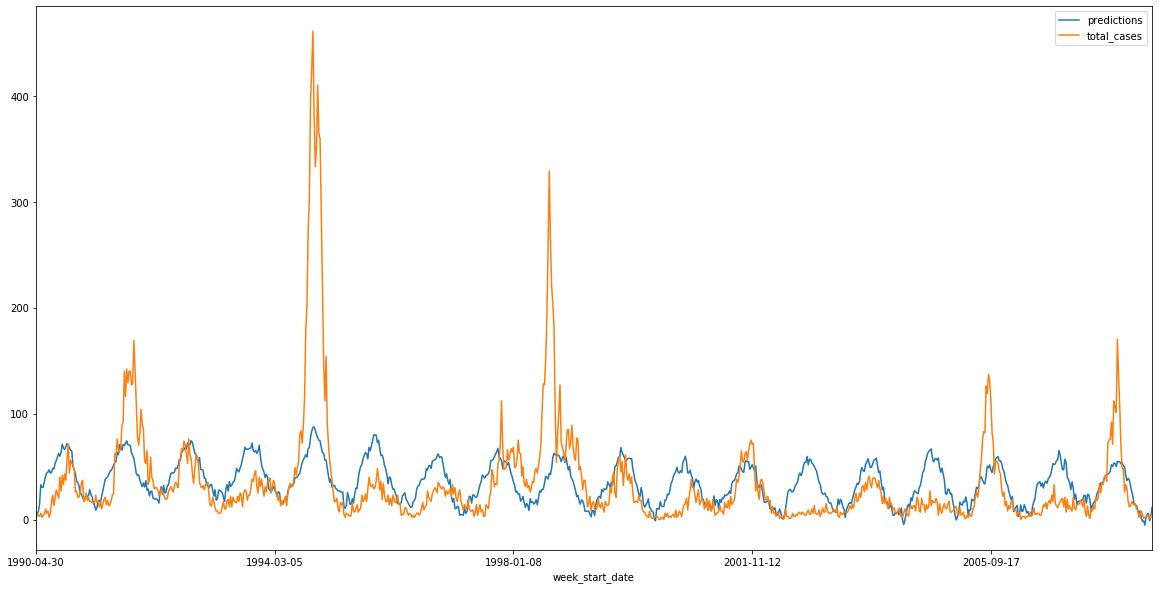

In [32]:
temp = df_sj.copy()
temp['predictions'] = model.predict(scaler.transform(X))
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(y = 'predictions', ax = ax);
temp.plot(y = 'total_cases', ax = ax);

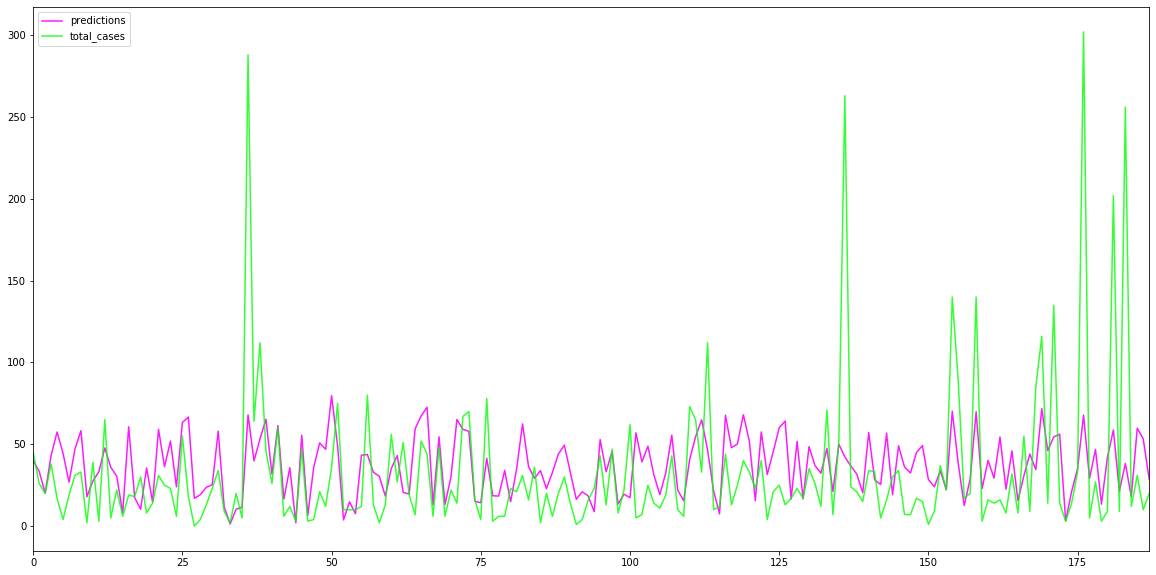

In [35]:
temp = pd.DataFrame()
temp['total_cases'] = y_test
temp['predictions'] = model.predict(X_test)
temp.reset_index(drop = True, inplace = True)
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(kind = 'line', y = 'predictions', ax = ax, color = 'fuchsia', alpha = 0.9);
temp.plot(kind = 'line', y = 'total_cases', ax = ax, secondary_y = False, color = 'lime', alpha = 0.8);

In [36]:
model = LassoCV(n_alphas=500, cv=10, max_iter = 100000)
model.fit(X_train, y_train)

print(model.alpha_)
best_alpha = model.alpha_
model = Lasso(alpha = best_alpha)
model.fit(X_train, y_train)
L_model = model
print(model.score(X_train, y_train))
print('CV Score: ',cross_val_score(Lasso(alpha = best_alpha), X_train, y_train, cv = 5).mean())
print('Test Score: ', model.score(X_test, y_test))
print('5 CV MAE Score: ',cross_val_score(Lasso(alpha = best_alpha), X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * -1)
print('10 CV MAE Score: ',cross_val_score(Lasso(alpha = best_alpha), X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error').mean() * -1)
predictions = model.predict(X_test)
print('Test MAE Score: ' ,mean_absolute_error(predictions, y_test))

0.03717472525338669
0.351556422577851
CV Score:  0.09211481951236913
Test Score:  0.10844949247157722
5 CV MAE Score:  27.994820219625126
10 CV MAE Score:  27.641530768499962
Test MAE Score:  28.324948036824736


In [37]:
sj_Lasso_model = model
filename = 'Models/sj_Lasso_model.sav'
pickle.dump((sj_Lasso_model), open(filename, 'wb'))
sj_scaler = scaler
pickle.dump((sj_scaler), open('Scalers/sj_scaler', 'wb'))

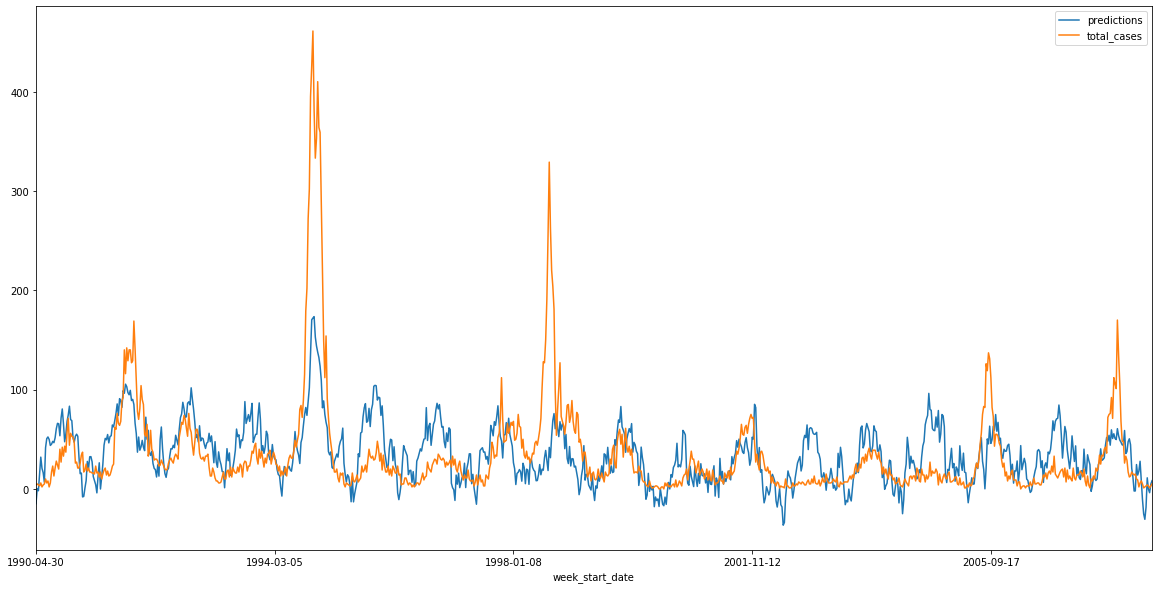

In [38]:
temp = df_sj.copy()
temp['predictions'] = model.predict(scaler.transform(X))
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(y = 'predictions', ax = ax);
temp.plot(y = 'total_cases', ax = ax);

In [39]:
coefs = pd.DataFrame({'variable': X.columns,
                      'R_coef': R_model.coef_,
                      'R_abs_coef': np.abs(R_model.coef_),
                      'L_coef': L_model.coef_,
                      'L_abs_coef': np.abs(L_model.coef_)})

coefs.sort_values('L_abs_coef', inplace=True, ascending=False)

coefs.head(20)

variable     R_coef  R_abs_coef     L_coef  \
38                       ndvi_se_d2 -16.551200   16.551200 -85.992844   
8         reanalysis_max_air_temp_k   6.309935    6.309935  82.106080   
2                           ndvi_se -13.553509   13.553509 -80.051491   
6             reanalysis_avg_temp_k  -5.812139    5.812139 -79.364812   
72                         sin_week  45.340217   45.340217  74.773043   
20                       ndvi_se_d1 -13.634144   13.634144 -74.580163   
39                       ndvi_sw_d2   9.879994    9.879994  73.401051   
21                       ndvi_sw_d1  10.761094   10.761094  70.631112   
3                           ndvi_sw   8.663987    8.663987  68.932464   
56                       ndvi_se_d3 -13.199605   13.199605 -62.995079   
57                       ndvi_sw_d3   7.718032    7.718032  55.398714   
69            station_max_temp_c_d3  13.258009   13.258009  52.278254   
24         reanalysis_avg_temp_k_d1  -5.922003    5.922003 -50.168446   
55                       ndvi_nw_d3  -3.428926    3.428926 -41.900567   
10  reanalysis_precip_amt_kg_per_m2  -1.157706    1.157706 -41.498384   
42         reanalysis_avg_temp_k_d2  -4.386676    4.386676 -41.115469   
68       station_diur_temp_rng_c_d3  -4.470437    4.470437 -37.737741   
44     reanalysis_max_air_temp_k_d2   3.388175    3.388175  37.228060   
54                       ndvi_ne_d3   5.662692    5.662692  33.587981   
15               station_max_temp_c  16.794935   16.794935  28.725819   

    L_abs_coef  
38   85.992844  
8    82.106080  
2    80.051491  
6    79.364812  
72   74.773043  
20   74.580163  
39   73.401051  
21   70.631112  
3    68.932464  
56   62.995079  
57   55.398714  
69   52.278254  
24   50.168446  
55   41.900567  
10   41.498384  
42   41.115469  
68   37.737741  
44   37.228060  
54   33.587981  
15   28.725819

# Iquitos

In [40]:
X = df_iq.copy()
y = X.pop('total_cases')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [41]:
clf = SVR()
gamma_range = np.logspace(-1, 1, 20)
C_range = np.logspace(-1, 2, 20)
param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(clf, param_grid, cv=5,
                    verbose=1, n_jobs = -1, scoring = 'neg_mean_absolute_error')
grid.fit(X_train, y_train)

model = grid.best_estimator_
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print('CV Score: ',cross_val_score(model, X_train, y_train, cv = 5).mean())
print('Test Score: ', model.score(X_test, y_test))
print('5 CV MAE Score: ',cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * -1)
print('10 CV MAE Score: ',cross_val_score(model, X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error').mean() * -1)
predictions = model.predict(X_test)
print('Test MAE Score: ' ,mean_absolute_error(predictions, y_test))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    6.9s finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.08624461580970644
CV Score:  -0.003724776005770393
Test Score:  0.14686328464473086
5 CV MAE Score:  5.827562657068945
10 CV MAE Score:  5.815367469159004
Test MAE Score:  4.427982444610327


In [42]:
model.get_params

<bound method BaseEstimator.get_params of SVR(C=1.8329807108324356, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.42813323987193935, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)>

In [43]:
iq_SVM_model = model
filename = 'Models/iq_SVM_model.sav'
pickle.dump((iq_SVM_model), open(filename, 'wb'))
iq_scaler = scaler
pickle.dump((iq_scaler), open('Scalers/iq_scaler', 'wb'))

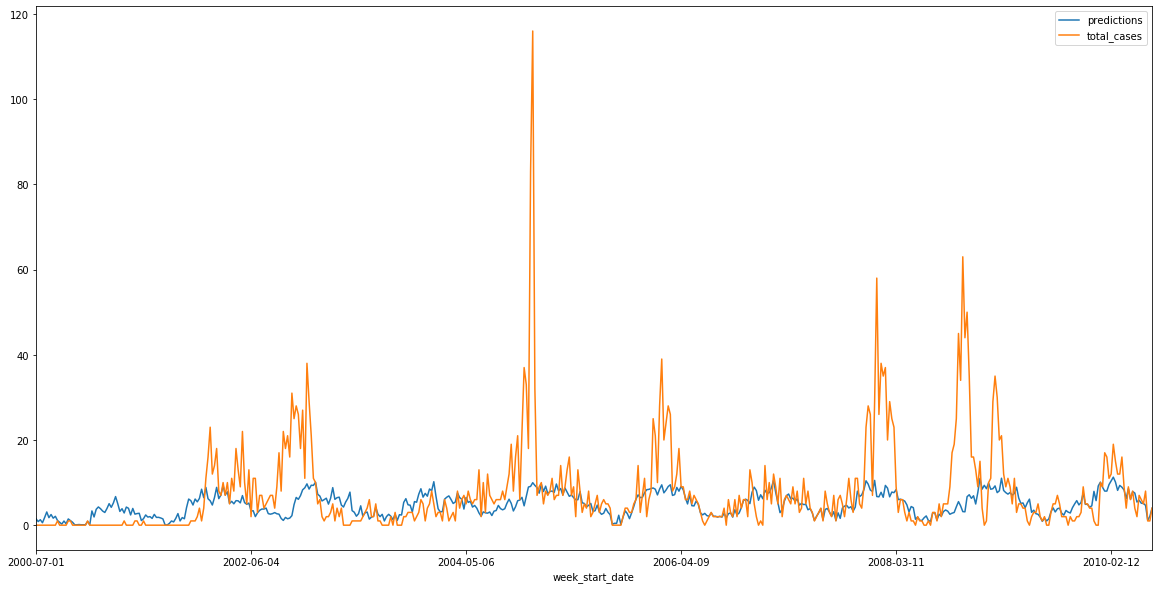

In [44]:
temp = df_iq.copy()
temp['predictions'] = model.predict(scaler.transform(X))
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(y = 'predictions', ax = ax);
temp.plot(y = 'total_cases', ax = ax);

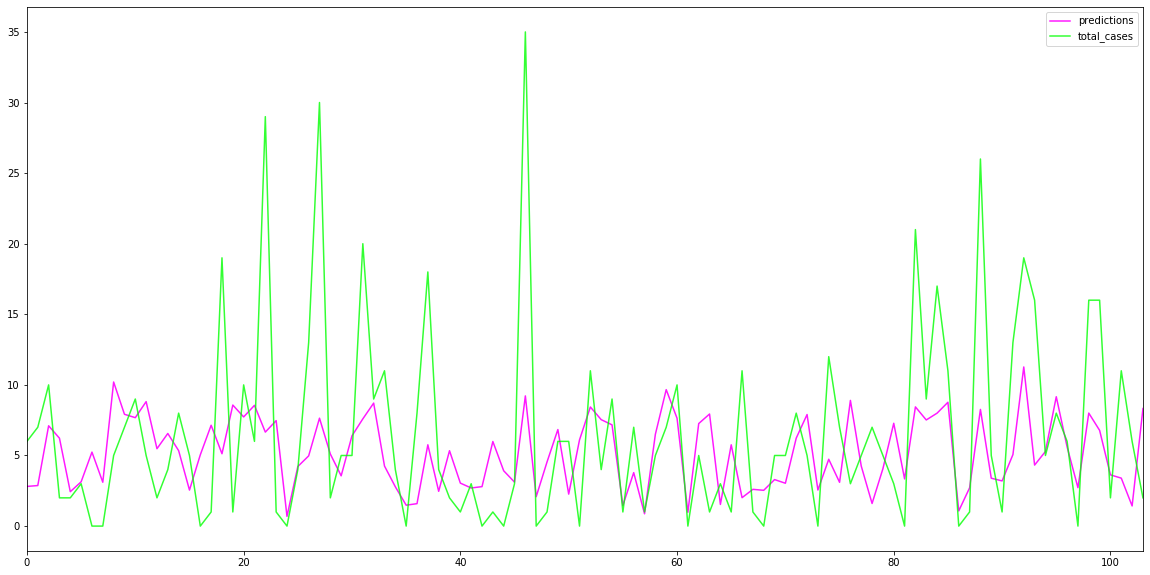

In [45]:
temp = pd.DataFrame()
temp['total_cases'] = y_test
temp['predictions'] = model.predict(X_test)
temp.reset_index(drop = True, inplace = True)
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(kind = 'line', y = 'predictions', ax = ax, color = 'fuchsia', alpha = 0.9);
temp.plot(kind = 'line', y = 'total_cases', ax = ax, secondary_y = False, color = 'lime', alpha = 0.8);

In [46]:
SV = pd.DataFrame({'Variable' : X.columns ,
                    'Support Vector' : pd.DataFrame(model.support_vectors_).mean()})

SV.sort_values(by = 'Support Vector', ascending = False)

Variable  Support Vector
47  reanalysis_relative_humidity_percent_d2        0.761089
11     reanalysis_relative_humidity_percent        0.758885
65  reanalysis_relative_humidity_percent_d3        0.744624
29  reanalysis_relative_humidity_percent_d1        0.710272
34                    station_min_temp_c_d1        0.681251
16                       station_min_temp_c        0.681096
70                    station_min_temp_c_d3        0.678536
63             reanalysis_min_air_temp_k_d3        0.658585
27             reanalysis_min_air_temp_k_d1        0.656479
9                 reanalysis_min_air_temp_k        0.655216
45             reanalysis_min_air_temp_k_d2        0.652691
25           reanalysis_dew_point_temp_k_d1        0.648315
43           reanalysis_dew_point_temp_k_d2        0.647098
31                    station_avg_temp_c_d1        0.645257
7               reanalysis_dew_point_temp_k        0.643801
61           reanalysis_dew_point_temp_k_d3        0.642991
54                               ndvi_ne_d3        0.624968
52                    station_min_temp_c_d2        0.613535
55                               ndvi_nw_d3        0.566504
37                               ndvi_nw_d2        0.553666
62             reanalysis_max_air_temp_k_d3        0.552523
36                               ndvi_ne_d2        0.548301
18                               ndvi_ne_d1        0.545443
60                 reanalysis_avg_temp_k_d3        0.545426
19                               ndvi_nw_d1        0.534494
24                 reanalysis_avg_temp_k_d1        0.525485
6                     reanalysis_avg_temp_k        0.523966
42                 reanalysis_avg_temp_k_d2        0.523871
44             reanalysis_max_air_temp_k_d2        0.511524
66                     reanalysis_tdtr_k_d3        0.505490
..                                      ...             ...
59                 reanalysis_air_temp_k_d3        0.459175
41                 reanalysis_air_temp_k_d2        0.458972
5                     reanalysis_air_temp_k        0.458605
0                                   ndvi_ne        0.451345
30                     reanalysis_tdtr_k_d1        0.441425
38                               ndvi_se_d2        0.434206
2                                   ndvi_se        0.432690
56                               ndvi_se_d3        0.431404
20                               ndvi_se_d1        0.429244
3                                   ndvi_sw        0.421648
57                               ndvi_sw_d3        0.418267
39                               ndvi_sw_d2        0.418237
21                               ndvi_sw_d1        0.415712
12                        reanalysis_tdtr_k        0.410361
51                    station_max_temp_c_d2        0.355650
69                    station_max_temp_c_d3        0.354552
33                    station_max_temp_c_d1        0.318687
15                       station_max_temp_c        0.318091
40                  precipitation_amt_mm_d2        0.307209
4                      precipitation_amt_mm        0.302718
58                  precipitation_amt_mm_d3        0.298879
22                  precipitation_amt_mm_d1        0.298501
10          reanalysis_precip_amt_kg_per_m2        0.162502
28       reanalysis_precip_amt_kg_per_m2_d1        0.161334
46       reanalysis_precip_amt_kg_per_m2_d2        0.160936
64       reanalysis_precip_amt_kg_per_m2_d3        0.158518
53                     station_precip_mm_d2        0.113960
71                     station_precip_mm_d3        0.111503
35                     station_precip_mm_d1        0.110931
17                        station_precip_mm        0.110563

[73 rows x 2 columns]

In [47]:
model = RidgeCV(alphas=np.logspace(-1, 3, 500), cv=10, scoring = 'neg_mean_absolute_error')
model.fit(X_train, y_train)
R_model = model
print(model.alpha_)
best_alpha = model.alpha_
print(model.score(X_train, y_train))
print('CV Score: ',cross_val_score(Ridge(alpha = best_alpha), X_train, y_train, cv = 5).mean())
print('Test Score: ', model.score(X_test, y_test))
print('5 CV MAE Score: ',cross_val_score(Ridge(alpha = best_alpha), X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * -1)
print('10 CV MAE Score: ',cross_val_score(Ridge(alpha = best_alpha), X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error').mean() * -1)
predictions = model.predict(X_test)
print('Test MAE Score: ' ,mean_absolute_error(predictions, y_test))


33.50040829913133
0.12518835641166437
CV Score:  0.03143218363585813
Test Score:  0.022378756645556996
5 CV MAE Score:  6.654926391079276
10 CV MAE Score:  6.6436970392315615
Test MAE Score:  5.469119525604161


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
iq_Ridge_model = model
filename = 'Models/iq_Ridge_model.sav'
pickle.dump((iq_Ridge_model), open(filename, 'wb'))
iq_scaler = scaler
pickle.dump((iq_scaler), open('Scalers/iq_scaler', 'wb'))

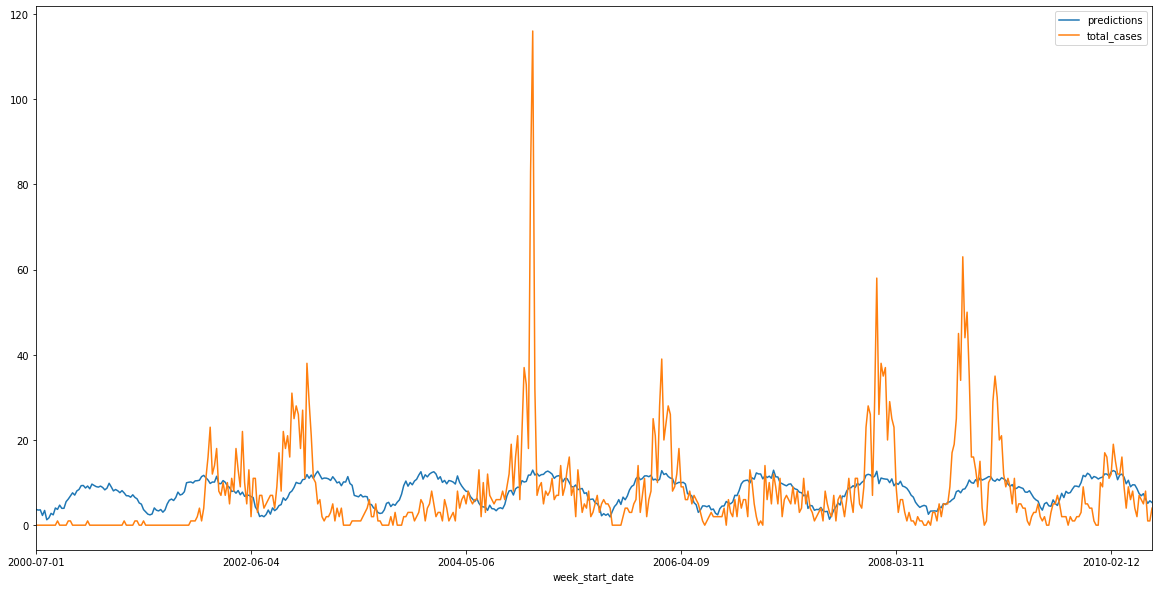

In [49]:
temp = df_iq.copy()
temp['predictions'] = model.predict(scaler.transform(X))
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(y = 'predictions', ax = ax);
temp.plot(y = 'total_cases', ax = ax);

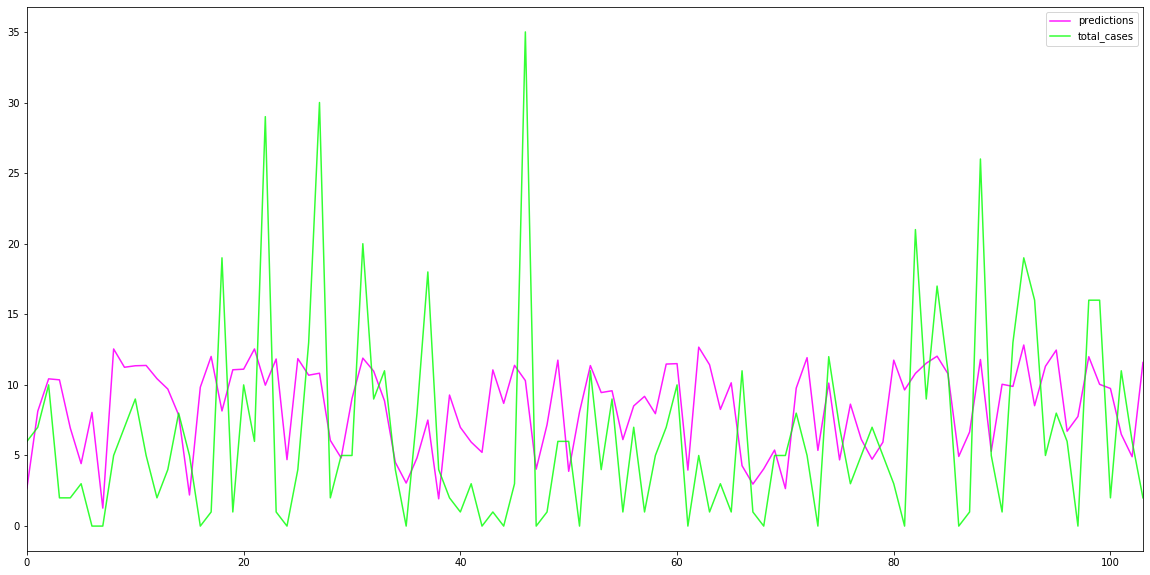

In [50]:
temp = pd.DataFrame()
temp['total_cases'] = y_test
temp['predictions'] = model.predict(X_test)
temp.reset_index(drop = True, inplace = True)
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(kind = 'line', y = 'predictions', ax = ax, color = 'fuchsia', alpha = 0.9);
temp.plot(kind = 'line', y = 'total_cases', ax = ax, secondary_y = False, color = 'lime', alpha = 0.8);

In [51]:
model = LassoCV(n_alphas=500, cv=10, max_iter = 100000)
model.fit(X_train, y_train)

print(model.alpha_)
best_alpha = model.alpha_
model = Lasso(alpha = best_alpha)
model.fit(X_train, y_train)
L_model = model
print(model.score(X_train, y_train))
print('CV Score: ',cross_val_score(Lasso(alpha = best_alpha), X_train, y_train, cv = 5).mean())
print('Test Score: ', model.score(X_test, y_test))
print('5 CV MAE Score: ',cross_val_score(Lasso(alpha = best_alpha), X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * -1)
print('10 CV MAE Score: ',cross_val_score(Lasso(alpha = best_alpha), X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error').mean() * -1)
predictions = model.predict(X_test)
print('Test MAE Score: ' ,mean_absolute_error(predictions, y_test))

0.17732846188487503
0.11149851832597202
CV Score:  0.04363014857912397
Test Score:  -0.02118498937317903
5 CV MAE Score:  6.513380795962656
10 CV MAE Score:  6.470047254736761
Test MAE Score:  5.6255369464010645


In [52]:
iq_Lasso_model = model
filename = 'Models/iq_Lasso_model.sav'
pickle.dump((iq_Lasso_model), open(filename, 'wb'))
iq_scaler = scaler
pickle.dump((iq_scaler), open('Scalers/iq_scaler', 'wb'))

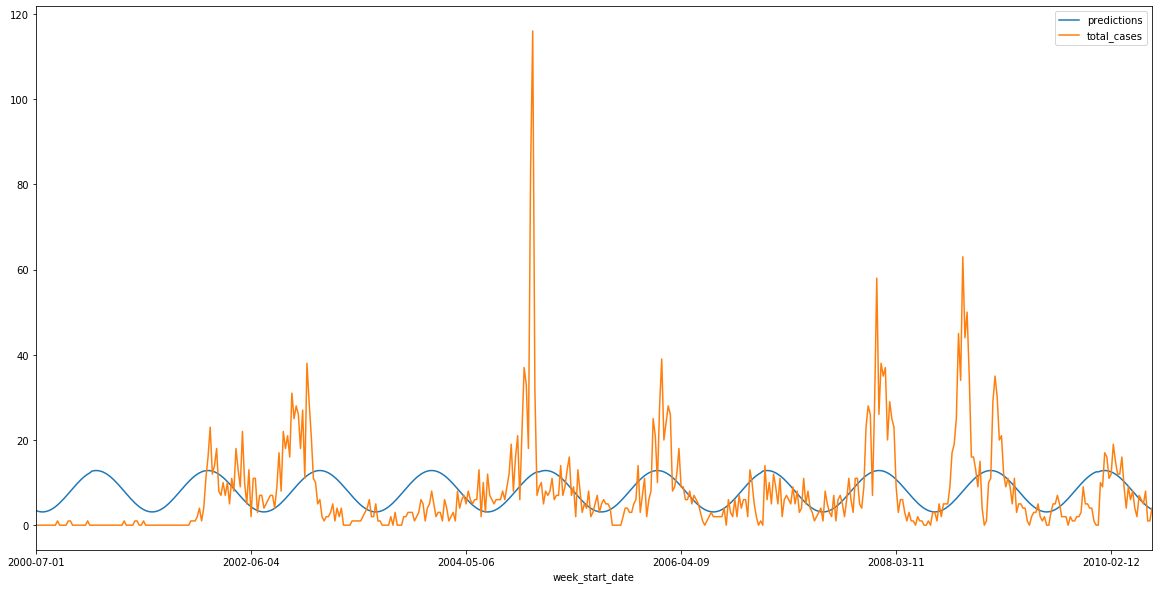

In [53]:
temp = df_iq.copy()
temp['predictions'] = model.predict(scaler.transform(X))
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(y = 'predictions', ax = ax);
temp.plot(y = 'total_cases', ax = ax);

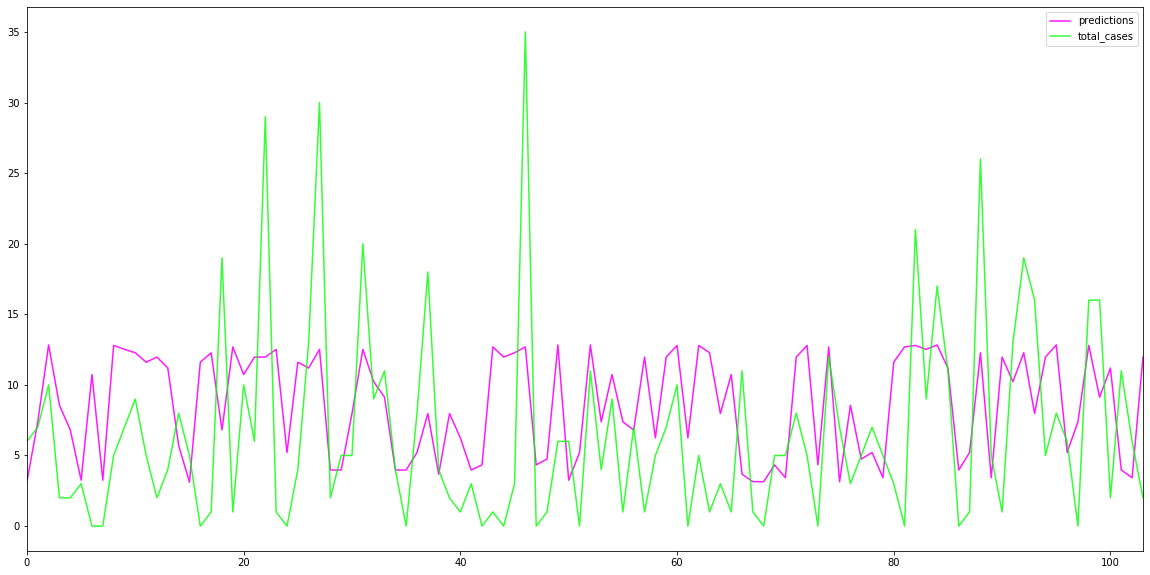

In [54]:
temp = pd.DataFrame()
temp['total_cases'] = y_test
temp['predictions'] = model.predict(X_test)
temp.reset_index(drop = True, inplace = True)
fig, ax = plt.subplots(figsize = (20, 10))
temp.plot(kind = 'line', y = 'predictions', ax = ax, color = 'fuchsia', alpha = 0.9);
temp.plot(kind = 'line', y = 'total_cases', ax = ax, secondary_y = False, color = 'lime', alpha = 0.8);

In [55]:
coefs = pd.DataFrame({'variable': X.columns,
                      'R_coef': R_model.coef_,
                      'R_abs_coef': np.abs(R_model.coef_),
                      'L_coef': L_model.coef_,
                      'L_abs_coef': np.abs(L_model.coef_)})

coefs.sort_values('R_abs_coef', inplace=True, ascending=False)

coefs.head(20)

variable    R_coef  R_abs_coef    L_coef  \
72                                 sin_week  4.894649    4.894649  9.720384   
69                    station_max_temp_c_d3  1.374897    1.374897  0.000000   
34                    station_min_temp_c_d1  1.361209    1.361209  0.000000   
16                       station_min_temp_c  1.225560    1.225560  0.000000   
3                                   ndvi_sw  1.210952    1.210952  0.000000   
20                               ndvi_se_d1 -1.161678    1.161678 -0.000000   
52                    station_min_temp_c_d2  1.127951    1.127951  0.000000   
71                     station_precip_mm_d3  0.963904    0.963904  0.000000   
7               reanalysis_dew_point_temp_k  0.934190    0.934190  0.000000   
38                               ndvi_se_d2 -0.881948    0.881948 -0.000000   
56                               ndvi_se_d3 -0.845244    0.845244 -0.000000   
0                                   ndvi_ne  0.827903    0.827903  0.000000   
43           reanalysis_dew_point_temp_k_d2  0.800367    0.800367  0.000000   
25           reanalysis_dew_point_temp_k_d1  0.784179    0.784179  0.000000   
58                  precipitation_amt_mm_d3  0.778822    0.778822  0.000000   
70                    station_min_temp_c_d3  0.739380    0.739380  0.000000   
47  reanalysis_relative_humidity_percent_d2  0.738032    0.738032  0.000000   
9                 reanalysis_min_air_temp_k  0.703945    0.703945  0.000000   
33                    station_max_temp_c_d1  0.677839    0.677839  0.000000   
4                      precipitation_amt_mm -0.672390    0.672390 -0.000000   

    L_abs_coef  
72    9.720384  
69    0.000000  
34    0.000000  
16    0.000000  
3     0.000000  
20    0.000000  
52    0.000000  
71    0.000000  
7     0.000000  
38    0.000000  
56    0.000000  
0     0.000000  
43    0.000000  
25    0.000000  
58    0.000000  
70    0.000000  
47    0.000000  
9     0.000000  
33    0.000000  
4     0.000000

## Submission Creation

In [56]:
data = pd.read_csv('dengue_features_test.csv')
df = data.copy()

In [57]:
test_sj, test_iq = pre_processing(df, period = 3)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [58]:
X = test_sj
scaler = pickle.load(open('Scalers/sj_scaler', 'rb'))

X = scaler.transform(X)

In [59]:
filename = 'Models/sj_SVM_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
model = loaded_model

In [62]:
sj_predictions = model.predict(X)
sj_predictions = [round(num, 0) for num in sj_predictions]
sum(sj_predictions) / len(sj_predictions)

22.380769230769232

In [63]:
X = test_iq
scaler = pickle.load(open('Scalers/iq_scaler', 'rb'))

X = scaler.transform(X)

In [64]:
filename = 'Models/iq_SVM_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
model = loaded_model

In [65]:
iq_predictions = model.predict(X)
iq_predictions = [round(num, 0) for num in iq_predictions]
sum(iq_predictions) / len(iq_predictions)

4.583333333333333

In [66]:
predicted = sj_predictions + iq_predictions

In [67]:
sub_df = data[['city', 'year', 'weekofyear']]
sub_df['total_cases'] = predicted

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
sub_df.total_cases = sub_df.total_cases.apply(lambda x: int(x))

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [69]:
for i in range(len(sub_df)):
    if sub_df.total_cases[i]<0:
        sub_df.total_cases[i] = 0

In [70]:
sub_df

city  year  weekofyear  total_cases
0     sj  2008          18            4
1     sj  2008          19            7
2     sj  2008          20           10
3     sj  2008          21           12
4     sj  2008          22           14
5     sj  2008          23           18
6     sj  2008          24           16
7     sj  2008          25           19
8     sj  2008          26           18
9     sj  2008          27           21
10    sj  2008          28           28
11    sj  2008          29           26
12    sj  2008          30           16
13    sj  2008          31           26
14    sj  2008          32           29
15    sj  2008          33           31
16    sj  2008          34           35
17    sj  2008          35           30
18    sj  2008          36           38
19    sj  2008          37           28
20    sj  2008          38           35
21    sj  2008          39           37
22    sj  2008          40           34
23    sj  2008          41           32
24    sj  2008          42           36
25    sj  2008          43           36
26    sj  2008          44           32
27    sj  2008          45           34
28    sj  2008          46           24
29    sj  2008          47           27
..   ...   ...         ...          ...
386   iq  2012          48            7
387   iq  2012          49            8
388   iq  2012          50            8
389   iq  2012          51            8
390   iq  2013           1            9
391   iq  2013           2            8
392   iq  2013           3            8
393   iq  2013           4            8
394   iq  2013           5            6
395   iq  2013           6            7
396   iq  2013           7            8
397   iq  2013           8            6
398   iq  2013           9            7
399   iq  2013          10            5
400   iq  2013          11            8
401   iq  2013          12            8
402   iq  2013          13           10
403   iq  2013          14            9
404   iq  2013          15            8
405   iq  2013          16            9
406   iq  2013          17            6
407   iq  2013          18            5
408   iq  2013          19            4
409   iq  2013          20            3
410   iq  2013          21            2
411   iq  2013          22            4
412   iq  2013          23            3
413   iq  2013          24            2
414   iq  2013          25            2
415   iq  2013          26            3

[416 rows x 4 columns]

In [71]:
sub_df.to_csv(r'Submissions/SVM.csv', index = False)

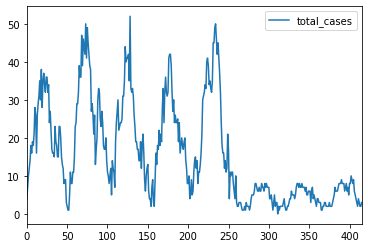

In [72]:
sub_df.plot(y = 'total_cases');

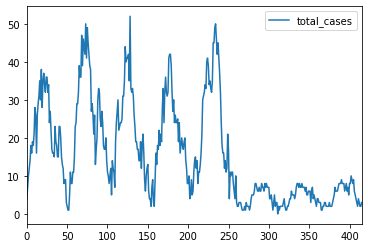

In [73]:
sub_df.plot(y = 'total_cases');